# **IMPORT PACKAGE**

In [1]:
import pandas as pd
import datetime
import os

# **DATA DEFINITION**

Pada bagian ini, dipetakan keyword yang akan digunakan untuk proses scrapping (per lapangan usaha), berikut juga dengan batasan waktu dari artikel yang ingin diambil. Di Badan Pusat Statistik, terdapat 17 sektor lapangan usaha, meliputi:
1.	Pertanian, Kehutanan, dan Perikanan
2.	Pertambangan dan Penggalian
3.	Industri Pengolahan
4.	Pengadaan Listrik, Gas
5.	Pengadaan Air, Pengelolaan Sampah, Limbah dan Daur Ulang
6.	Konstruksi
7.	Perdagangan Besar dan Eceran, Reparasi Mobil dan Sepeda Motor
8.	Transportasi dan Pergudangan
9.	Penyediaan Akomodasi dan Makan Minum
10.	Informasi dan Komunikasi
11.	Jasa Keuangan dan Asuransi	
12.	Real Estat	
13.	Jasa Perusahaan
14.	Administrasi Pemerintahan, Pertahanan dan Jaminan Sosial Wajib
15.	Jasa Pendidikan
16.	Jasa Kesehatan dan Kegiatan Sosial
17.	Jasa lainnya

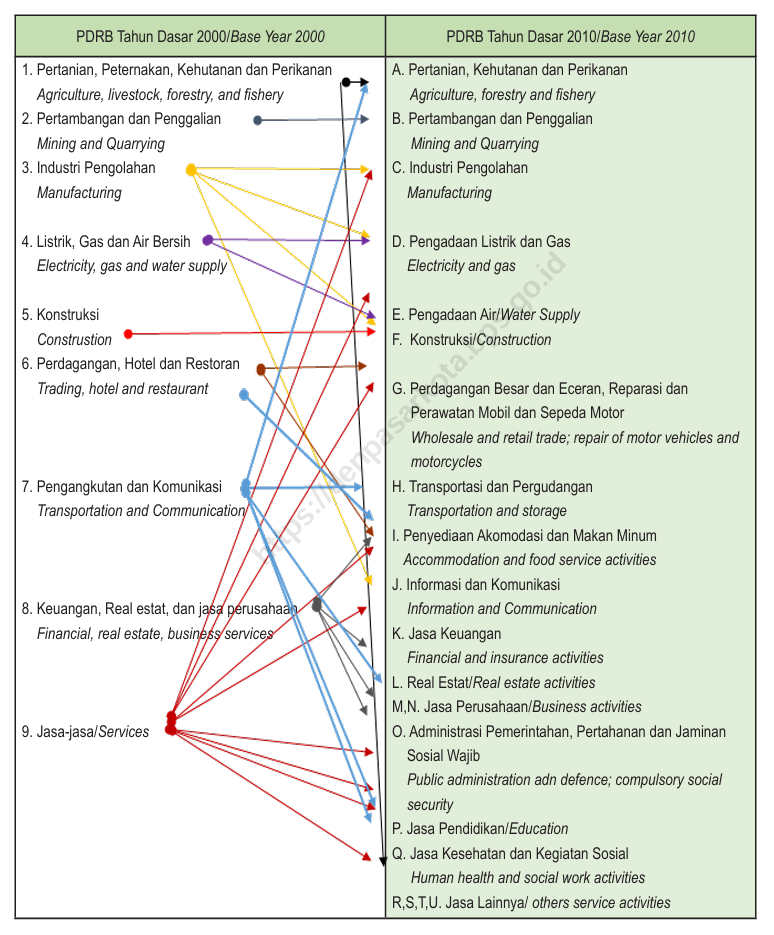

In [2]:
# Tentukan keywords dari masing-masing lapangan usaha
key_sektor = ['harga','pajak kendaraan','ekspor','bbm','pasar','pedagang','sembako']

keywords_scrap = key_sektor

# Tentukan rentang tanggal
start_date = datetime.date(2024, 10, 1)
end_date = datetime.date(2024, 11, 12)

# **SCRAPPING, PRE-CLEANING, & EXPORT (Scrapping BaliPost Lama)**

## 1. BaliPost

Fungsi dan package untuk scrapping di balipost ada pada kode di chunk berikut \
Aktifkan kalau pencarian di balipost sudah berjalan normal (saat kode ini dibuat sangat lambat)

In [3]:
# import requests
# from bs4 import BeautifulSoup
# import datetime
# import pandas as pd

# # Fungsi untuk melakukan scraping dari BaliPost
# def scrape_balipost(keyword, start_date, end_date, max_results, max_pages):
#     """
#     Fungsi untuk melakukan scraping artikel dari situs BaliPost berdasarkan keyword dan rentang tanggal.

#     Args:
#     - keyword (str): Keyword pencarian.
#     - start_date (datetime.date): Tanggal awal.
#     - end_date (datetime.date): Tanggal akhir.
#     - max_results (int): Maksimum jumlah artikel yang diambil.
#     - max_pages (int): Maksimum jumlah halaman yang diambil.

#     Returns:
#     - results (list): Daftar artikel yang berisi judul, link, tanggal, keyword, dan isi.
#     """
#     results = []

#     # Mengganti spasi dengan tanda "+" untuk keyword yang lebih dari satu kata
#     search_keyword = keyword.replace(" ", "+")
#     base_url = f"https://www.balipost.com/search/{search_keyword}"
#     current_page = 1

#     while len(results) < max_results and current_page <= max_pages:
#         url = f"{base_url}/page/{current_page}" if current_page > 1 else base_url
#         print(f"Scraping halaman {current_page} dari URL: {url}")
#         response = requests.get(url)

#         if response.status_code != 200:
#             print(f"Error saat mengakses halaman {current_page}. Status code: {response.status_code}")
#             break

#         soup = BeautifulSoup(response.content, "html.parser")
#         articles = soup.find_all("div", class_="td_module_10 td_module_wrap td-animation-stack")

#         if not articles:
#             print(f"Tidak ada artikel di halaman {current_page}, berhenti scraping.")
#             break

#         for article in articles:
#             title_element = article.find("h3", class_="entry-title td-module-title")
#             if title_element:
#                 title = title_element.text.strip()
#                 link = article.find("a")["href"]

#                 date_element = article.find("time", class_="entry-date updated td-module-date")
#                 if date_element:
#                     date_str = date_element["datetime"][:10]
#                     date = datetime.datetime.strptime(date_str, "%Y-%m-%d").date()

#                     # Cek apakah tanggal artikel dalam rentang yang diinginkan
#                     if not (start_date <= date <= end_date):
#                         continue

#                 content_element = article.find("div", class_="td-excerpt")
#                 content = content_element.text.strip() if content_element else ""

#                 results.append({"title": title, "keyword": keyword, "source": "BaliPost", "link": link, "date": date, "content": content})
#                 if len(results) >= max_results:
#                     break

#         pagination = soup.find("a", class_="page", title=str(current_page + 1))
#         if pagination:
#             current_page += 1
#         else:
#             break

#     return results


Memulai proses scrapping berita

In [4]:
# # Step 4: Scraping untuk setiap keyword
# # Takes a LOOOOOOOOOOOONG time

# all_news = []

# for keyword in keywords_scrap:
#     print(f"\nMemulai scraping untuk keyword: {keyword}")
#     news = scrape_balipost(keyword, start_date, end_date, max_results=25, max_pages=3)

#     # Tampilkan jumlah artikel yang berhasil diekstrak untuk keyword ini
#     num_articles = len(news)
#     print(f"Jumlah artikel yang diekstrak untuk keyword '{keyword}': {num_articles}")

#     all_news.extend(news)

# # Step 5: Simpan hasil ke dalam file Excel
# berita_balipost = pd.DataFrame(all_news)
# berita_balipost

In [5]:
# # Import melalui kode ini kalau sudah ada raw data scrapping BaliPost yang terpisah dari proses scrapping diatas (hanya untuk BaliPost)
# berita_balipost = pd.read_excel("C:/Users/asus/OneDrive/BPS/Neraca/berita_sektor7_triwulan4_bali.xlsx")
# berita_balipost

Pre-cleaning \
Hasil Scrapping BaliPost harus difilter terlebih dahulu wilayah (dari isi konten) dan judulnya (kadang tidak sesuai dengan kata yang diinginkan) \
Contoh: Kata kunci --> Ikan || Judul ditemukan --> DicarIKAN, DijanjIKAN

In [6]:
# # Keyword to filter out
# keywords_filter = ["TABANAN","SINGARAJA","DENPASAR","MANGUPURA","AMLAPURA","SEMARAPURA","NEGARA","GIANYAR","BANGLI"]

# # Build the condition for multiple keywords
# pattern = '|'.join(keywords_filter)  # Create a pattern that matches any of the keywords

# # Filter out rows where 'Description' contains the keyword
# berita_balipost_2 = pd.DataFrame(berita_balipost[berita_balipost['content'].str.contains(pattern, case=False, na=False)])

# # Show the filtered DataFrame
# print(berita_balipost_2.shape)
# berita_balipost_2

In [7]:
# # Build the regular expression pattern with word boundaries
# pattern_1 = r'\b(' + '|'.join(keywords_scrap) + r')\b'  # Ensures "Ikan" is a whole word

# # Filter rows where 'Title' contains the keyword as a whole word (case insensitive)
# berita_balipost_3 = berita_balipost_2[berita_balipost_2['title'].str.contains(pattern_1, case=False, na=False)]

# # Show the filtered DataFrame
# print(berita_balipost_3.shape)
# berita_balipost_3

In [8]:
# # Remove Duplication
# berita_balipost_3 = berita_balipost_3.drop_duplicates(subset='title', keep='first')
# print(berita_balipost_3.shape)
# berita_balipost_3

## 2. DetikBali

In [9]:
import math
import requests
from bs4 import BeautifulSoup as bs
import pandas as pd

# Define web scraping functions
# Fungsi untuk menuju ke portal berita
def search_url(query, date_start, date_end, pages_num=1):
    url = f"https://www.detik.com/search/searchnews?query={query}&siteid=123&sortby=time&fromdatex={date_start}&todatex={date_end}&page={pages_num}&result_type=relevansi"
    
    print(url)
    response = requests.get(url)
    page = bs(response.content, "html.parser")

    return page

# Fungsi untuk menghitung jumlah artikel di halaman terakhir
def last_page_article_count(query, date_start, date_end, page_num):
    last_page = search_url(query, date_start, date_end, page_num)
    article_list = last_page.find("div", {"class": "list-content"})

    if article_list:
        articles = article_list.find_all('article', class_='list-content__item')           
    article_count = len(articles)
    
    return article_count

def news_search_results(query, date_start, date_end):
    page = search_url(query, date_start, date_end)
    
    pagination = page.find("div", {"class": "pagination"})
    if pagination:
        page_numbers = pagination.find_all('a', class_='pagination__item')
        if page_numbers:
            last_page_number = int(page_numbers[-2].text)

        # Menghitung jumlah artikel di halaman terakhir
        last_page_articles = last_page_article_count(query, date_start, date_end, last_page_number)

        # Menghitung jumlah artikel yang diperoleh
        num = (last_page_number - 1) * 10 + last_page_articles
    else:
        num = 0
        last_page_number = 1
    
    return num, last_page_number

# Fungsi untuk mendapatkan isi konten
def news_get_content(article_url):
    response = requests.get(article_url)
    content_page = bs(response.content, "html.parser")

    content_list = []
    multiple_page = content_page.find("div", {"class": "detail__multiple"})
    if multiple_page:
        multiple_page = [x.get("href") for x in multiple_page.find_all("a")][:-1]
        for page in multiple_page:
            response = requests.get(page)
            content_page = bs(response.content, "html.parser")
            content_list.extend([p.get_text() for p in content_page.find_all("p") if not p.get_text().startswith('\n\n\n\nHalaman\n\n') and
                                p.get_text() not in ['',
                                                    '[Gambas:Instagram]',
                                                    '[Gambas:Video 20detik]',
                                                    '\r\nADVERTISEMENT\r\n',
                                                    '\r\n    ADVERTISEMENT\r\n',
                                                    '\r\n    ADVERTISEMENT\r\n  ',
                                                    '\r\n   ADVERTISEMENT\r\n  ',
                                                    '\r\n   ADVERTISEMENT\r\n',
                                                    '\r\n        SCROLL TO RESUME CONTENT\r\n  ',
                                                    'Selengkapnya di halaman selanjutnya.',
                                                    '\n\t\t\t\t\tAyo share cerita pengalaman dan upload photo album travelingmu di sini.\n\n\t\t\t\t\t\t\t\t\t\t\tSilakan Daftar atau Masuk\n']])
    else:
        content_list.extend([p.get_text() for p in content_page.find_all("p")
                            if p.get_text() not in ['',
                                                    '[Gambas:Instagram]',
                                                    '[Gambas:Video 20detik]',
                                                    '\r\nADVERTISEMENT\r\n',
                                                    '\r\n    ADVERTISEMENT\r\n',
                                                    '\r\n    ADVERTISEMENT\r\n  ',
                                                    '\r\n   ADVERTISEMENT\r\n  ',
                                                    '\r\n   ADVERTISEMENT\r\n',
                                                    '\r\n        SCROLL TO RESUME CONTENT\r\n  ',
                                                    '\n\t\t\t\t\tAyo share cerita pengalaman dan upload photo album travelingmu di sini.\n\n\t\t\t\t\t\t\t\t\t\t\tSilakan Daftar atau Masuk\n']])

    content_list = '\n\n'.join(content_list)

    return content_list

# Fungsi untuk mengecek berita yang merupakan advertorial
def news_advertorial_check(article_url):
    response = requests.get(article_url)
    content_page = bs(response.content, "html.parser")

    author = content_page.find("meta", {"content": "Advertorial"})

    return bool(author)

# Fungsi untuk mencari artikel dengan output adalah jumlah artikel dan halaman terakhir
def search_articles(query, from_date, to_date, ads_article, article_content):
    results_num, last_page = news_search_results(query, from_date, to_date)
        
    print(f"Result num: {results_num}")
    print(f"Last page: {last_page}")

    return results_num, last_page

# Fungsi untuk memperoleh list artikel
def articles_list(query, from_date, to_date, ads_article, article_content, num_articles, last_page):
    article_lists = []
    pages = math.ceil(num_articles / 10)
    
    print("\nMemulai Scrapping dari DetikBali untuk keyword:", query)
    for i in range(1, pages + 1):
        print("Scrapping halaman", i, "dari URL: ")
        page = search_url(query, from_date, to_date, i)
        articles = page.find_all("article", class_="list-content__item")

        for article in articles:
            title = article.find("a", {"class": "media__link"}).get('dtr-ttl')
            category = article.find('h2', class_='media__subtitle').text.strip()
            publish_date = article.find('span', title=True).get('title')
            article_url = article.find("a", {"class": "media__link"}).get('href')
                
            # print(f"Title: {title}")
            # print(f"Category: {category}")
            # print(f"Publish Date: {publish_date}")
            # print(f"Article URL: {article_url}")

            if ads_article and news_advertorial_check(article_url):
                continue
            else:
                if article_content:
                    content = news_get_content(article_url)
                    if (
                        any(title in existing_article["title"] for existing_article in article_lists) or 
                        any(content in existing_article["content"] for existing_article in article_lists)
                    ):
                        continue
                    else:
                        article_lists.append({
                            "title": title,
                            "keyword": query,
                            "source": category,
                            "link": article_url,
                            "date": publish_date,
                            "content": content
                        })
                else:
                    if any(title in existing_article["title"] for existing_article in article_lists):
                        continue
                    else:
                        article_lists.append({
                            "title": title,
                            "keyword": query,
                            "link": article_url,
                            "date": publish_date
                        })
            if len(article_lists) == num_articles:
                break
        if len(article_lists) == num_articles:
            break
            
    print(f"Jumlah artikel dengan kata kunci {keyword}: {len(article_lists)} artikel.")
    data = article_lists
    return data

In [10]:
# Scraping untuk setiap keyword
all_news_detik = []

for keyword in keywords_scrap:
    search_keyword = keyword.replace(" ", "+")
    news = articles_list(search_keyword, start_date.strftime('%d/%m/%Y'), end_date.strftime('%d/%m/%Y'), False, True, 25, 5)
    all_news_detik.extend(news)

# Simpan hasil ke dalam file Excel
berita_detik = pd.DataFrame(all_news_detik) 
berita_detik


Memulai Scrapping dari DetikBali untuk keyword: harga
Scrapping halaman 1 dari URL: 
https://www.detik.com/search/searchnews?query=harga&siteid=123&sortby=time&fromdatex=01/10/2024&todatex=12/11/2024&page=1&result_type=relevansi
Scrapping halaman 2 dari URL: 
https://www.detik.com/search/searchnews?query=harga&siteid=123&sortby=time&fromdatex=01/10/2024&todatex=12/11/2024&page=2&result_type=relevansi
Scrapping halaman 3 dari URL: 
https://www.detik.com/search/searchnews?query=harga&siteid=123&sortby=time&fromdatex=01/10/2024&todatex=12/11/2024&page=3&result_type=relevansi
Jumlah artikel dengan kata kunci harga: 25 artikel.

Memulai Scrapping dari DetikBali untuk keyword: pajak+kendaraan
Scrapping halaman 1 dari URL: 
https://www.detik.com/search/searchnews?query=pajak+kendaraan&siteid=123&sortby=time&fromdatex=01/10/2024&todatex=12/11/2024&page=1&result_type=relevansi
Scrapping halaman 2 dari URL: 
https://www.detik.com/search/searchnews?query=pajak+kendaraan&siteid=123&sortby=time&fr

title  keyword     source  \
0    Pemprov NTB Harap Rencana Penurunan Harga Tike...    harga  detikBali   
1    Harga Emas Terjun Setelah Donald Trump Terpili...    harga  detikBali   
2      Kenaikan Harga Beras Kerek Inflasi Tahunan Bali    harga  detikBali   
3    Cara Beli Tiket Timnas Indonesia, Harga-Daftar...    harga  detikBali   
4    Harga Bahan Pokok di GPM Mataram: Beras Rp 11....    harga  detikBali   
..                                                 ...      ...        ...   
160  Soto Sapi Pak Made, Aroma Rempah Mengingatkan ...  sembako  detikBali   
161  Lampu yang Mendadak Padam Saat Jokowi Resmikan...  sembako  detikBali   
162  Kebakaran Hebat Pasar Sri Bantas Tabanan, Pulu...  sembako  detikBali   
163  Erupsi Gunung Lewotobi Laki-laki: 2.472 Warga ...  sembako  detikBali   
164  Lupa Matikan Dupa, Empat Kios di Seraya Barat ...  sembako  detikBali   

                                                  link  \
0    https://www.detik.com/bali/nusra/d-7634929/pem...   
1    https://www.detik.com/bali/bisnis/d-7627981/ha...   
2    https://www.detik.com/bali/bisnis/d-7617202/ke...   
3    https://www.detik.com/bali/berita/d-7618917/ca...   
4    https://www.detik.com/bali/bisnis/d-7627248/ha...   
..                                                 ...   
160  https://www.detik.com/bali/kuliner/d-7609291/s...   
161  https://www.detik.com/bali/nusra/d-7567838/lam...   
162  https://www.detik.com/bali/berita/d-7625273/ke...   
163  https://www.detik.com/bali/nusra/d-7624418/eru...   
164  https://www.detik.com/bali/berita/d-7592596/lu...   

                              date  \
0    Selasa, 12 Nov 2024 15:56 WIB   
1     Jumat, 08 Nov 2024 07:14 WIB   
2     Jumat, 01 Nov 2024 13:27 WIB   
3    Minggu, 03 Nov 2024 08:30 WIB   
4     Kamis, 07 Nov 2024 16:11 WIB   
..                             ...   
160  Minggu, 27 Okt 2024 21:20 WIB   
161    Rabu, 02 Okt 2024 08:25 WIB   
162    Rabu, 06 Nov 2024 15:02 WIB   
163    Rabu, 06 Nov 2024 08:03 WIB   
164   Kamis, 17 Okt 2024 15:50 WIB   

                                               content  
0    Pemerintah Provinsi (Pemprov) Nusa Tenggara Ba...  
1    Harga emas secara global terjun setelah Donald...  
2    Badan Pusat Statistik (BPS) Provinsi Bali menc...  
3    Halo, detikers! Apakah Anda siap menyaksikan T...  
4    Sebanyak tiga ton beras stabilisasi pasokan da...  
..                                                 ...  
160  Kuliner tradisional selalu memiliki daya tarik...  
161  Lampu penerangan jalan umum yang biasanya meny...  
162  Kebakaran hebat terjadi di Pasar Sri Bantas, D...  
163  Sebanyak 2.472 warga tinggal di tiga lokasi pe...  
164  Empat kios di depan GOR Serbaguna di Banjar Di...  

[165 rows x 6 columns]

Pre-cleaning

In [11]:
# Filter Wilayah
keywords_filter = ["Tabanan","Singaraja","Denpasar","Badung","Karangasem","Klungkung","Jembrana","Gianyar","Bangli"]

# Build the condition for multiple keywords
pattern = '|'.join(keywords_filter)  # Create a pattern that matches any of the keywords

# Filter out rows where 'Description' contains the keyword
berita_detik_2 = pd.DataFrame(berita_detik[berita_detik['content'].str.contains(pattern, case=False, na=False)])

# Show the filtered DataFrame
print(berita_detik_2.shape)
berita_detik_2

(66, 6)


title  keyword     source  \
2      Kenaikan Harga Beras Kerek Inflasi Tahunan Bali    harga  detikBali   
5    Sensasi Unik Es Salak Rp 5 Ribuan, Resep yang ...    harga  detikBali   
10   PHRI Bali Sayangkan Kebijakan Pangkas Perjalan...    harga  detikBali   
13   Harga Daging Babi Naik Jadi Rp 110 Ribu per Kg...    harga  detikBali   
14   Harapan Pedagang kepada Calon Gubernur Bali: L...    harga  detikBali   
..                                                 ...      ...        ...   
154  Nasib Pedagang Pasar Sri Bantas Tabanan Setela...  sembako  detikBali   
156  Uskup Terpilih Labuan Bajo Mgr Maksimus Regus ...  sembako  detikBali   
160  Soto Sapi Pak Made, Aroma Rempah Mengingatkan ...  sembako  detikBali   
162  Kebakaran Hebat Pasar Sri Bantas Tabanan, Pulu...  sembako  detikBali   
164  Lupa Matikan Dupa, Empat Kios di Seraya Barat ...  sembako  detikBali   

                                                  link  \
2    https://www.detik.com/bali/bisnis/d-7617202/ke...   
5    https://www.detik.com/bali/kuliner/d-7634938/s...   
10   https://www.detik.com/bali/bisnis/d-7635245/ph...   
13   https://www.detik.com/bali/bisnis/d-7571586/ha...   
14   https://www.detik.com/bali/pilkada/d-7567558/h...   
..                                                 ...   
154  https://www.detik.com/bali/berita/d-7627863/na...   
156  https://www.detik.com/bali/nusra/d-7613686/usk...   
160  https://www.detik.com/bali/kuliner/d-7609291/s...   
162  https://www.detik.com/bali/berita/d-7625273/ke...   
164  https://www.detik.com/bali/berita/d-7592596/lu...   

                              date  \
2     Jumat, 01 Nov 2024 13:27 WIB   
5    Selasa, 12 Nov 2024 16:02 WIB   
10   Selasa, 12 Nov 2024 18:27 WIB   
13    Jumat, 04 Okt 2024 11:13 WIB   
14   Selasa, 01 Okt 2024 21:39 WIB   
..                             ...   
154   Kamis, 07 Nov 2024 23:10 WIB   
156    Rabu, 30 Okt 2024 13:55 WIB   
160  Minggu, 27 Okt 2024 21:20 WIB   
162    Rabu, 06 Nov 2024 15:02 WIB   
164   Kamis, 17 Okt 2024 15:50 WIB   

                                               content  
2    Badan Pusat Statistik (BPS) Provinsi Bali menc...  
5    Saat cuaca Bali lagi panas-panasnya, es salak ...  
10   Ketua Perhimpunan Hotel dan Restoran Indonesia...  
13   Penampahan Kuningan (sehari menjelang Hari Ray...  
14   Sejumlah pedagang di Denpasar menaruh harapan ...  
..                                                 ...  
154  Ketut Sudiarsa (42) tampak mengamati puing-pui...  
156  Uskup Terpilih Labuan Bajo, Monsinyur (Mgr) Ma...  
160  Kuliner tradisional selalu memiliki daya tarik...  
162  Kebakaran hebat terjadi di Pasar Sri Bantas, D...  
164  Empat kios di depan GOR Serbaguna di Banjar Di...  

[66 rows x 6 columns]

In [12]:
# Build the regular expression pattern with word boundaries
pattern = r'\b(' + '|'.join(keywords_scrap) + r')\b'

# Filter rows where 'Title' contains the keyword as a whole word (case insensitive)
berita_detik_3 = berita_detik_2[berita_detik_2['title'].str.contains(pattern, case=False, na=False)]

# Show the filtered DataFrame
print(berita_detik_3.shape)
berita_detik_3

(30, 6)


C:\Users\asus\AppData\Local\Temp\ipykernel_25204\1307647291.py:5: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  berita_detik_3 = berita_detik_2[berita_detik_2['title'].str.contains(pattern, case=False, na=False)]


title          keyword  \
2      Kenaikan Harga Beras Kerek Inflasi Tahunan Bali            harga   
13   Harga Daging Babi Naik Jadi Rp 110 Ribu per Kg...            harga   
14   Harapan Pedagang kepada Calon Gubernur Bali: L...            harga   
16   Air Terjun Yeh Mampeh: Lokasi, Harga, Jam Oper...            harga   
27   Atasi Macet, Ambara Bakal Naikkan Pajak Kendar...  pajak+kendaraan   
51   Sugawa Korry Cerita Masa Kejayaan Buleleng Eks...           ekspor   
54   Menteri KKP Sebut Puluhan Perusahaan Ajukan Ek...           ekspor   
91     Kenaikan Harga Beras Kerek Inflasi Tahunan Bali              bbm   
100  Viral, Kera Putih Muncul di Pura Pasar Agung K...            pasar   
101  Nasib Pedagang Pasar Sri Bantas Tabanan Setela...            pasar   
102  Pedagang Pasar Umum Negara yang Terdampak Banj...            pasar   
103  Pasar Umum Negara Kebanjiran, Barang-barang Da...            pasar   
104  Blusukan ke Pasar Badung, Kaesang Kampanyekan ...            pasar   
105  PAS Kritik Klaim Giri soal Pembangunan Pasar B...            pasar   
110  Cegah Kebocoran Parkir, Palang Parkir Otomatis...            pasar   
111  Karya di Pura Pasar Agung, Pendakian ke Gunung...            pasar   
112  Dana-Swadi Janji Pasang Wifi Gratis untuk Selu...            pasar   
114  Kebakaran Hebat Pasar Sri Bantas Tabanan, Pulu...            pasar   
115  Kebakaran Pasar Sri Bantas Akibat Korsleting L...            pasar   
126  Nasib Pedagang Pasar Sri Bantas Tabanan Setela...         pedagang   
127  Pedagang Pasar Umum Negara yang Terdampak Banj...         pedagang   
129  Harapan Pedagang kepada Calon Gubernur Bali: L...         pedagang   
131  Pasar Umum Negara Kebanjiran, Barang-barang Da...         pedagang   
137  Cegah Kebocoran Parkir, Palang Parkir Otomatis...         pedagang   
144  Kebakaran Hebat Pasar Sri Bantas Tabanan, Pulu...         pedagang   
145  Kebakaran Pasar Sri Bantas Akibat Korsleting L...         pedagang   
147  Dana-Swadi Janji Pasang Wifi Gratis untuk Selu...         pedagang   
151  Pedagang Pasar Umum Negara yang Terdampak Banj...          sembako   
154  Nasib Pedagang Pasar Sri Bantas Tabanan Setela...          sembako   
162  Kebakaran Hebat Pasar Sri Bantas Tabanan, Pulu...          sembako   

        source                                               link  \
2    detikBali  https://www.detik.com/bali/bisnis/d-7617202/ke...   
13   detikBali  https://www.detik.com/bali/bisnis/d-7571586/ha...   
14   detikBali  https://www.detik.com/bali/pilkada/d-7567558/h...   
16   detikBali  https://www.detik.com/bali/wisata/d-7583344/ai...   
27   detikBali  https://www.detik.com/bali/pilkada/d-7596422/a...   
51   detikBali  https://www.detik.com/bali/pilkada/d-7630734/s...   
54   detikBali  https://www.detik.com/bali/berita/d-7578772/me...   
91   detikBali  https://www.detik.com/bali/bisnis/d-7617202/ke...   
100  detikBali  https://www.detik.com/bali/berita/d-7632911/vi...   
101  detikBali  https://www.detik.com/bali/berita/d-7627863/na...   
102  detikBali  https://www.detik.com/bali/berita/d-7622606/pe...   
103  detikBali  https://www.detik.com/bali/bisnis/d-7617449/pa...   
104  detikBali  https://www.detik.com/bali/pilkada/d-7619694/b...   
105  detikBali  https://www.detik.com/bali/pilkada/d-7615983/p...   
110  detikBali  https://www.detik.com/bali/bisnis/d-7569004/ce...   
111  detikBali  https://www.detik.com/bali/wisata/d-7566078/ka...   
112  detikBali  https://www.detik.com/bali/pilkada/d-7608752/d...   
114  detikBali  https://www.detik.com/bali/berita/d-7625273/ke...   
115  detikBali  https://www.detik.com/bali/berita/d-7625668/ke...   
126  detikBali  https://www.detik.com/bali/berita/d-7627863/na...   
127  detikBali  https://www.detik.com/bali/berita/d-7622606/pe...   
129  detikBali  https://www.detik.com/bali/pilkada/d-7567558/h...   
131  detikBali  https://www.detik.com/bali/bisnis/d-7617449/pa...   
137  detikBali  https://www.detik.com/bali/bisnis/d-7569004/ce...  

Menghapus berita yang duplikat

In [13]:
# Remove Duplication
berita_detik_4 = berita_detik_3.drop_duplicates(subset='title', keep='first')
print(berita_detik_4.shape)
berita_detik_4

(18, 6)


title          keyword  \
2      Kenaikan Harga Beras Kerek Inflasi Tahunan Bali            harga   
13   Harga Daging Babi Naik Jadi Rp 110 Ribu per Kg...            harga   
14   Harapan Pedagang kepada Calon Gubernur Bali: L...            harga   
16   Air Terjun Yeh Mampeh: Lokasi, Harga, Jam Oper...            harga   
27   Atasi Macet, Ambara Bakal Naikkan Pajak Kendar...  pajak+kendaraan   
51   Sugawa Korry Cerita Masa Kejayaan Buleleng Eks...           ekspor   
54   Menteri KKP Sebut Puluhan Perusahaan Ajukan Ek...           ekspor   
100  Viral, Kera Putih Muncul di Pura Pasar Agung K...            pasar   
101  Nasib Pedagang Pasar Sri Bantas Tabanan Setela...            pasar   
102  Pedagang Pasar Umum Negara yang Terdampak Banj...            pasar   
103  Pasar Umum Negara Kebanjiran, Barang-barang Da...            pasar   
104  Blusukan ke Pasar Badung, Kaesang Kampanyekan ...            pasar   
105  PAS Kritik Klaim Giri soal Pembangunan Pasar B...            pasar   
110  Cegah Kebocoran Parkir, Palang Parkir Otomatis...            pasar   
111  Karya di Pura Pasar Agung, Pendakian ke Gunung...            pasar   
112  Dana-Swadi Janji Pasang Wifi Gratis untuk Selu...            pasar   
114  Kebakaran Hebat Pasar Sri Bantas Tabanan, Pulu...            pasar   
115  Kebakaran Pasar Sri Bantas Akibat Korsleting L...            pasar   

        source                                               link  \
2    detikBali  https://www.detik.com/bali/bisnis/d-7617202/ke...   
13   detikBali  https://www.detik.com/bali/bisnis/d-7571586/ha...   
14   detikBali  https://www.detik.com/bali/pilkada/d-7567558/h...   
16   detikBali  https://www.detik.com/bali/wisata/d-7583344/ai...   
27   detikBali  https://www.detik.com/bali/pilkada/d-7596422/a...   
51   detikBali  https://www.detik.com/bali/pilkada/d-7630734/s...   
54   detikBali  https://www.detik.com/bali/berita/d-7578772/me...   
100  detikBali  https://www.detik.com/bali/berita/d-7632911/vi...   
101  detikBali  https://www.detik.com/bali/berita/d-7627863/na...   
102  detikBali  https://www.detik.com/bali/berita/d-7622606/pe...   
103  detikBali  https://www.detik.com/bali/bisnis/d-7617449/pa...   
104  detikBali  https://www.detik.com/bali/pilkada/d-7619694/b...   
105  detikBali  https://www.detik.com/bali/pilkada/d-7615983/p...   
110  detikBali  https://www.detik.com/bali/bisnis/d-7569004/ce...   
111  detikBali  https://www.detik.com/bali/wisata/d-7566078/ka...   
112  detikBali  https://www.detik.com/bali/pilkada/d-7608752/d...   
114  detikBali  https://www.detik.com/bali/berita/d-7625273/ke...   
115  detikBali  https://www.detik.com/bali/berita/d-7625668/ke...   

                              date  \
2     Jumat, 01 Nov 2024 13:27 WIB   
13    Jumat, 04 Okt 2024 11:13 WIB   
14   Selasa, 01 Okt 2024 21:39 WIB   
16    Jumat, 11 Okt 2024 19:45 WIB   
27    Sabtu, 19 Okt 2024 20:46 WIB   
51    Sabtu, 09 Nov 2024 22:55 WIB   
54   Selasa, 08 Okt 2024 22:37 WIB   
100   Senin, 11 Nov 2024 14:37 WIB   
101   Kamis, 07 Nov 2024 23:10 WIB   
102  Selasa, 05 Nov 2024 07:47 WIB   
103   Jumat, 01 Nov 2024 15:17 WIB   
104  Minggu, 03 Nov 2024 10:18 WIB   
105   Kamis, 31 Okt 2024 17:15 WIB   
110    Rabu, 02 Okt 2024 17:44 WIB   
111  Selasa, 01 Okt 2024 09:41 WIB   
112  Minggu, 27 Okt 2024 15:25 WIB   
114    Rabu, 06 Nov 2024 15:02 WIB   
115    Rabu, 06 Nov 2024 17:32 WIB   

                                               content  
2    Badan Pusat Statistik (BPS) Provinsi Bali menc...  
13   Penampahan Kuningan (sehari menjelang Hari Ray...  
14   Sejumlah pedagang di Denpasar menaruh harapan ...  
16   Bali menjadi salah satu destinasi wisata di du...  
27   Calon wali kota Denpasar nomor urut 1 Gede Ngu...  
51   Calon bupati (cabup) Buleleng nomor urut 1 Nyo...  
54   Menteri Kelautan dan Perikanan Sakti Wahyu Tre...  
100  Seekor kera putih muncul di sekitar Pura Pasar...  
101  Ketut Sudiarsa (42) tampak mengamati puing-pui...  
102  Para pedagang

## 3. RadarBali

In [14]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from webdriver_manager.chrome import ChromeDriverManager
from bs4 import BeautifulSoup
import time
from datetime import datetime

# Tanggal batas yang ingin dibandingkan
start_date = datetime(2024, 10, 1)  # 1 Oktober 2024
end_date = datetime(2024, 12, 31)  # 31 Desember 2024

# Inisialisasi driver Chrome tanpa mengunduh chromedriver secara manual
service = Service(ChromeDriverManager().install())
driver = webdriver.Chrome(service=service)
# Fungsi untuk melakukan scraping dan mengambil isian kelas latest__subtitle, latest__link, dan latest__date
def get_news(query, start_page, end_page):
    results = []

    print("\nMemulai scrapping RadarBali untuk keyword:", query)
    for page in range(start_page, end_page + 1):
        url = f"https://radarbali.jawapos.com/search?q={query}&sort=latest&page={page}"
        print("Scrapping halaman",page,"dari URL:",url)
        driver.get(url)
        time.sleep(10)  # Tunggu beberapa detik agar halaman selesai dimuat

        # Ambil konten halaman dan buat objek BeautifulSoup
        soup = BeautifulSoup(driver.page_source, "html.parser")

        # Ambil semua elemen dengan class latest__item
        articles = soup.find_all('div', class_='latest__item')

        # Ambil informasi dari setiap artikel
        for article in articles:
            subtitle = article.find('h4', class_='latest__subtitle')
            title = article.find('a', class_='latest__link')
            link = article.find('a', class_='latest__link')['href']
            date = article.find('date', class_='latest__date')

            # Menampilkan hasil jika elemen ditemukan, filter tanggal sesuai yang diinginkan
            if subtitle and title and date:
                date_berita = date.get_text(strip=True)

                # Fungsi untuk mengonversi nama bulan menjadi angka bulan
                def get_month_number(month_name):
                    months = {
                        "Januari": 1,
                        "Februari": 2,
                        "Maret": 3,
                        "April": 4,
                        "Mei": 5,
                        "Juni": 6,
                        "Juli": 7,
                        "Agustus": 8,
                        "September": 9,
                        "Oktober": 10,
                        "November": 11,
                        "Desember": 12
                    }
                    return months.get(month_name)

                # Fungsi untuk mem-parsing tanggal dalam format yang diberikan
                def parse_date(date_str):
                    # Pisahkan hari dan waktu
                    day_part, time_part = date_str.split(" | ")

                    # Ambil tanggal dan bulan dari bagian day_part
                    day_name, day, month_name, year = day_part.split()
                    day = int(day)
                    year = int(year)
                    month = get_month_number(month_name)
                    
                    # Gabungkan menjadi format yang bisa diproses oleh datetime
                    # Format waktu seperti '21:46 WIB', jadi kita hanya perlu ambil jam dan menit
                    time = time_part.replace(" WIB", "")

                    # Gabungkan semuanya ke format yang sesuai dengan datetime
                    date_string = f"{year}-{month:02d}-{day:02d} {time}"

                    # Mengonversi ke objek datetime
                    return datetime.strptime(date_string, "%Y-%m-%d %H:%M")
            
                parsed_date = parse_date(date_berita)

                # Membandingkan apakah parsed_date berada dalam rentang 1 Oktober 2024 sampai 31 Desember 2024
                if start_date <= parsed_date <= end_date:
                    results.append({"title": title.get_text(strip=True), "keyword": query, "source": "RadarBali", "link": link, "date": date.get_text(strip=True), "content": subtitle.get_text(strip=True)})
                    # print("Subtitle:", subtitle.get_text(strip=True))
                    # print("Title:", title.get_text(strip=True))
                    # print("Link:", link)
                    # print("Date:", date.get_text(strip=True))
                    # print('-' * 80)
                else:
                    break

    return results

import pandas as pd

all_news_radarbali = []

for keyword in keywords_scrap:
    search_keyword = keyword.replace(" ", "+")
    news = get_news(search_keyword, start_page=1, end_page=5)

    # Tampilkan jumlah artikel yang berhasil diekstrak untuk keyword ini
    num_articles = len(news)
    print(f"Jumlah artikel yang diekstrak untuk keyword '{keyword}': {num_articles}")

    all_news_radarbali.extend(news)

driver.quit()


Memulai scrapping RadarBali untuk keyword: harga
Scrapping halaman 1 dari URL: https://radarbali.jawapos.com/search?q=harga&sort=latest&page=1
Scrapping halaman 2 dari URL: https://radarbali.jawapos.com/search?q=harga&sort=latest&page=2
Scrapping halaman 3 dari URL: https://radarbali.jawapos.com/search?q=harga&sort=latest&page=3
Scrapping halaman 4 dari URL: https://radarbali.jawapos.com/search?q=harga&sort=latest&page=4
Scrapping halaman 5 dari URL: https://radarbali.jawapos.com/search?q=harga&sort=latest&page=5
Jumlah artikel yang diekstrak untuk keyword 'harga': 7

Memulai scrapping RadarBali untuk keyword: pajak+kendaraan
Scrapping halaman 1 dari URL: https://radarbali.jawapos.com/search?q=pajak+kendaraan&sort=latest&page=1
Scrapping halaman 2 dari URL: https://radarbali.jawapos.com/search?q=pajak+kendaraan&sort=latest&page=2
Scrapping halaman 3 dari URL: https://radarbali.jawapos.com/search?q=pajak+kendaraan&sort=latest&page=3
Scrapping halaman 4 dari URL: https://radarbali.jawap

In [15]:
berita_radarbali = pd.DataFrame(all_news_radarbali)
berita_radarbali

title   keyword     source  \
0   Jaga Stabilitas Inflasi, Pemkot Denpasar Canan...     harga  RadarBali   
1   Topupgaming.com: Platform Terbaik untuk Top Up...     harga  RadarBali   
2   Harga Kopi Naik, Picu Inflasi di Bali, Komodit...     harga  RadarBali   
3   Daya Beli Melemah, Bisnis Properti Bali Disebu...     harga  RadarBali   
4   Wisata Kuliner Bersama LestariDiskon, Dapat Po...     harga  RadarBali   
..                                                ...       ...        ...   
78  Prihatin Pedagang Kehujanan, Koster-Giri Siap ...  pedagang  RadarBali   
79  Peduli Warga Miskin yang Kurang Mampu Semut Be...   sembako  RadarBali   
80  Tanam Tuwuh GP Bali: Bagi 300 Paket Sembako di...   sembako  RadarBali   
81  PT Primo Indo Ikan Bagi-bagi Sembako Kepada Pe...   sembako  RadarBali   
82  Jimbaran Hijau Berbagi Sembako untuk 50 Lansia...   sembako  RadarBali   

                                                 link  \
0   https://radarbali.jawapos.com/denpasar/7053096...   
1   https://radarbali.jawapos.com/teknologi/705290...   
2   https://radarbali.jawapos.com/ekonomi/70527937...   
3   https://radarbali.jawapos.com/ekonomi/70521371...   
4   https://radarbali.jawapos.com/ekonomi/70520546...   
..                                                ...   
78  https://radarbali.jawapos.com/politika/7051795...   
79  https://radarbali.jawapos.com/berita-daerah/70...   
80  https://radarbali.jawapos.com/bali/705215586/t...   
81  https://radarbali.jawapos.com/ekonomi/70519985...   
82  https://radarbali.jawapos.com/bali/705163203/j...   

                                   date              content  
0    Rabu, 13 November 2024 | 20:28 WIB             Denpasar  
1    Jumat, 8 November 2024 | 14:43 WIB            Teknologi  
2     Rabu, 6 November 2024 | 06:00 WIB  Ekonomi & Perbankan  
3    Sabtu, 19 Oktober 2024 | 19:10 WIB  Ekonomi & Perbankan  
4    Kamis, 17 Oktober 2024 | 08:06 WIB  Ekonomi & Perbankan  
..                                  ...                  ...  
78     Rabu, 9 Oktober 2024 | 23:24 WIB             Politika  
79   Jumat, 8 November 2024 | 15:48 WIB        Berita Daerah  
80   Sabtu, 19 Oktober 2024 | 20:17 WIB                 Bali  
81  Selasa, 15 Oktober 2024 | 17:05 WIB  Ekonomi & Perbankan  
82    Sabtu, 5 Oktober 2024 | 11:10 WIB                 Bali  

[83 rows x 6 columns]

In [16]:
# Remove Duplication
berita_radarbali_2 = berita_radarbali.drop_duplicates(subset='title', keep='first')
print(berita_radarbali_2.shape)
berita_radarbali_2

(76, 6)


title   keyword     source  \
0   Jaga Stabilitas Inflasi, Pemkot Denpasar Canan...     harga  RadarBali   
1   Topupgaming.com: Platform Terbaik untuk Top Up...     harga  RadarBali   
2   Harga Kopi Naik, Picu Inflasi di Bali, Komodit...     harga  RadarBali   
3   Daya Beli Melemah, Bisnis Properti Bali Disebu...     harga  RadarBali   
4   Wisata Kuliner Bersama LestariDiskon, Dapat Po...     harga  RadarBali   
..                                                ...       ...        ...   
75  Jalan Kaki dari Puri Mengwi ke Pura Taman Ayun...  pedagang  RadarBali   
79  Peduli Warga Miskin yang Kurang Mampu Semut Be...   sembako  RadarBali   
80  Tanam Tuwuh GP Bali: Bagi 300 Paket Sembako di...   sembako  RadarBali   
81  PT Primo Indo Ikan Bagi-bagi Sembako Kepada Pe...   sembako  RadarBali   
82  Jimbaran Hijau Berbagi Sembako untuk 50 Lansia...   sembako  RadarBali   

                                                 link  \
0   https://radarbali.jawapos.com/denpasar/7053096...   
1   https://radarbali.jawapos.com/teknologi/705290...   
2   https://radarbali.jawapos.com/ekonomi/70527937...   
3   https://radarbali.jawapos.com/ekonomi/70521371...   
4   https://radarbali.jawapos.com/ekonomi/70520546...   
..                                                ...   
75  https://radarbali.jawapos.com/politika/7052024...   
79  https://radarbali.jawapos.com/berita-daerah/70...   
80  https://radarbali.jawapos.com/bali/705215586/t...   
81  https://radarbali.jawapos.com/ekonomi/70519985...   
82  https://radarbali.jawapos.com/bali/705163203/j...   

                                   date              content  
0    Rabu, 13 November 2024 | 20:28 WIB             Denpasar  
1    Jumat, 8 November 2024 | 14:43 WIB            Teknologi  
2     Rabu, 6 November 2024 | 06:00 WIB  Ekonomi & Perbankan  
3    Sabtu, 19 Oktober 2024 | 19:10 WIB  Ekonomi & Perbankan  
4    Kamis, 17 Oktober 2024 | 08:06 WIB  Ekonomi & Perbankan  
..                                  ...                  ...  
75    Rabu, 16 Oktober 2024 | 11:57 WIB             Politika  
79   Jumat, 8 November 2024 | 15:48 WIB        Berita Daerah  
80   Sabtu, 19 Oktober 2024 | 20:17 WIB                 Bali  
81  Selasa, 15 Oktober 2024 | 17:05 WIB  Ekonomi & Perbankan  
82    Sabtu, 5 Oktober 2024 | 11:10 WIB                 Bali  

[76 rows x 6 columns]

In [17]:
# Build the regular expression pattern with word boundaries
pattern = r'\b(' + '|'.join(keywords_scrap) + r')\b'

# Filter rows where 'Title' contains the keyword as a whole word (case insensitive)
berita_radarbali_3 = berita_radarbali_2.copy()
berita_radarbali_3 = berita_radarbali_2[berita_radarbali_2['title'].str.contains(pattern, case=False, na=False)]

# Show the filtered DataFrame
print(berita_radarbali_3.shape)
berita_radarbali_3

(44, 6)


C:\Users\asus\AppData\Local\Temp\ipykernel_25204\2112746010.py:6: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  berita_radarbali_3 = berita_radarbali_2[berita_radarbali_2['title'].str.contains(pattern, case=False, na=False)]


title          keyword  \
0   Jaga Stabilitas Inflasi, Pemkot Denpasar Canan...            harga   
1   Topupgaming.com: Platform Terbaik untuk Top Up...            harga   
2   Harga Kopi Naik, Picu Inflasi di Bali, Komodit...            harga   
3   Daya Beli Melemah, Bisnis Properti Bali Disebu...            harga   
4   Wisata Kuliner Bersama LestariDiskon, Dapat Po...            harga   
5   October Getaway: Staycation Nyaman, Harga Terj...            harga   
6   Harga Rokok Terus Melonjak dan Mencekik, Pemil...            harga   
10  Gelar Rakornas, Pembina Samsat Tingkat Nasiona...  pajak+kendaraan   
12  Kejar Target, Pemprov Bali Beri Pemutihan Paja...  pajak+kendaraan   
32  Penerapan Biodiesel B40 Tahun 2025 Terkendala ...           ekspor   
33  Petani Hortikultura Tabanan Dijamin Semringah,...           ekspor   
34  Gasss! Dua Pemain BBM Subsidi Ilegal Wilayah K...              bbm   
35  Duh, Tabrakan versus Truk Tangki BBM, Pemotor ...              bbm   
36  Kabar Hot! Kejari Denpasar Mulai Lirik Dugaan ...              bbm   
37  Fakta Baru!  Boks Siluman DK 9953 FD, Tampung ...              bbm   
38  Heboh Penyelewengan BBM Bersubsidi,  Pertamina...              bbm   
39  Jual BBM Subsidi ke Kapal Wisata, Pertamina Pa...              bbm   
40  SIKAT!!! Polda Bali dan Pertamina Usut Dugaan ...              bbm   
41  Ngeri! Salah Satu SPBU di Denpasar diduga Terl...              bbm   
45  Datangi Pasar Sri Bantas, Kediri, Tabanan, Tim...            pasar   
46  Satriya Siap Bangun 10 Pasar Desa dan Gerakan ...            pasar   
47  Duh, Ratusan Lapak dan Puluhan Kios Pedagang P...            pasar   
49  Cacat Konstruksi Bangunan Pasar Bukan Tanggung...            pasar   
51  The Sanur Perkenalkan KEK Kesehatan Sanur ke P...            pasar   
52  Nikmati Babi Guling di Pasar Kreneng Denpasar,...            pasar   
53  Biar Bisa Sigap Setiap Saat, Puluhan Pedagang ...            pasar   
54  Gegara Tahun Politik, Pilkada dan Pergantian P...            pasar   
57  Perumda Pasar Pangan Mangu Giri Sedana Badung ...            pasar   
58  10 WNA Terjaring  Operasi JAGRATARA Imigrasi N...            pasar   
59  Ambara-Adi Dengarkan Kebutuhan Pedagang Pasar ...            pasar   
60  Gegara Dugaan Intimidasi, Tim Gakkumdu Bawaslu...            pasar   
61  Taksir Nilai Aset Belum Tuntas, Pasar Relokasi...            pasar   
62  Tim Gakkumdu Bawaslu Periksa Kepala Pasar Taba...            pasar   
63  Prihatin Pedagang Kehujanan, Koster-Giri Siap ...            pasar   
65  Klungkung Ajukan Revitalisasi Pasar Umum Semar...            pasar   
66             Libur Hari Raya, Sampah Pasar Menumpuk            pasar   
67  Ketika Paslon Adicipta Kunjungi Pasar Rakyat d...            pasar   
68  Sapa Masyarakat Cemagi, Adi-Cipta Janji Penata...            pasar   
70  Terima Laporan, ORI Bali Datangi Pasar Umum Ne...            pasar   
75  Jalan Kaki dari Puri Mengwi ke Pura Taman Ayun...         pedagang   
79  Peduli Warga Miskin yang Kurang Mampu Semut Be...          sembako   
80  Tanam Tuwuh GP Bali: Bagi 300 Paket Sembako di...          sembako   
81  PT Primo Indo Ikan Bagi-bagi Sembako Kepada Pe...          sembako   
82  Jimbaran Hijau Berbagi Sembako untuk 50 Lansia...          sembako   

       source                                               link  \
0   RadarBali  https://radarbali.jawapos.com/denpasar/7053096...   
1   RadarBali  https://radarbali.jawapos.com/teknologi/705290...   
2   RadarBali  https://radarbali.jawapos.com/ekonomi/70527937...   
3   RadarBali  https://radarbali.jawapos.com/ekonomi/70521371...   
4   RadarBali  https://radarbali.jawapos.com/ekonomi/70520546...   
5   RadarBali  https://radarbali.jawapos.com/gaya-hidup/70519...   
6   RadarBali  https://radarbali.jawapos.com/hukum-kriminal/7...   
10  RadarBali  https://radarbali.jawapos.com/nasional/7052925...   
12  RadarBali  https://radarbali.jawapos.com/bali/705284172/k...   
32  RadarBali  https://radarbali.jawa

In [18]:
berita_radarbali_4 = berita_radarbali_3.copy()

# Nilai yang ingin kita hapus
values_to_remove = ['Sportmania','Foto Mania','Berita Daerah']
columns_to_check = ['content']

# Hapus baris yang memiliki nilai tersebut di sembarang kolom
berita_radarbali_4 = berita_radarbali_4[~berita_radarbali_4[columns_to_check].apply(lambda row: row.isin(values_to_remove).any(), axis=1)]
print(berita_radarbali_4.shape)
berita_radarbali_4


(42, 6)


title          keyword  \
0   Jaga Stabilitas Inflasi, Pemkot Denpasar Canan...            harga   
1   Topupgaming.com: Platform Terbaik untuk Top Up...            harga   
2   Harga Kopi Naik, Picu Inflasi di Bali, Komodit...            harga   
3   Daya Beli Melemah, Bisnis Properti Bali Disebu...            harga   
4   Wisata Kuliner Bersama LestariDiskon, Dapat Po...            harga   
5   October Getaway: Staycation Nyaman, Harga Terj...            harga   
6   Harga Rokok Terus Melonjak dan Mencekik, Pemil...            harga   
10  Gelar Rakornas, Pembina Samsat Tingkat Nasiona...  pajak+kendaraan   
12  Kejar Target, Pemprov Bali Beri Pemutihan Paja...  pajak+kendaraan   
32  Penerapan Biodiesel B40 Tahun 2025 Terkendala ...           ekspor   
33  Petani Hortikultura Tabanan Dijamin Semringah,...           ekspor   
34  Gasss! Dua Pemain BBM Subsidi Ilegal Wilayah K...              bbm   
35  Duh, Tabrakan versus Truk Tangki BBM, Pemotor ...              bbm   
36  Kabar Hot! Kejari Denpasar Mulai Lirik Dugaan ...              bbm   
37  Fakta Baru!  Boks Siluman DK 9953 FD, Tampung ...              bbm   
38  Heboh Penyelewengan BBM Bersubsidi,  Pertamina...              bbm   
39  Jual BBM Subsidi ke Kapal Wisata, Pertamina Pa...              bbm   
40  SIKAT!!! Polda Bali dan Pertamina Usut Dugaan ...              bbm   
41  Ngeri! Salah Satu SPBU di Denpasar diduga Terl...              bbm   
45  Datangi Pasar Sri Bantas, Kediri, Tabanan, Tim...            pasar   
46  Satriya Siap Bangun 10 Pasar Desa dan Gerakan ...            pasar   
47  Duh, Ratusan Lapak dan Puluhan Kios Pedagang P...            pasar   
51  The Sanur Perkenalkan KEK Kesehatan Sanur ke P...            pasar   
52  Nikmati Babi Guling di Pasar Kreneng Denpasar,...            pasar   
53  Biar Bisa Sigap Setiap Saat, Puluhan Pedagang ...            pasar   
54  Gegara Tahun Politik, Pilkada dan Pergantian P...            pasar   
57  Perumda Pasar Pangan Mangu Giri Sedana Badung ...            pasar   
58  10 WNA Terjaring  Operasi JAGRATARA Imigrasi N...            pasar   
59  Ambara-Adi Dengarkan Kebutuhan Pedagang Pasar ...            pasar   
60  Gegara Dugaan Intimidasi, Tim Gakkumdu Bawaslu...            pasar   
61  Taksir Nilai Aset Belum Tuntas, Pasar Relokasi...            pasar   
62  Tim Gakkumdu Bawaslu Periksa Kepala Pasar Taba...            pasar   
63  Prihatin Pedagang Kehujanan, Koster-Giri Siap ...            pasar   
65  Klungkung Ajukan Revitalisasi Pasar Umum Semar...            pasar   
66             Libur Hari Raya, Sampah Pasar Menumpuk            pasar   
67  Ketika Paslon Adicipta Kunjungi Pasar Rakyat d...            pasar   
68  Sapa Masyarakat Cemagi, Adi-Cipta Janji Penata...            pasar   
70  Terima Laporan, ORI Bali Datangi Pasar Umum Ne...            pasar   
75  Jalan Kaki dari Puri Mengwi ke Pura Taman Ayun...         pedagang   
80  Tanam Tuwuh GP Bali: Bagi 300 Paket Sembako di...          sembako   
81  PT Primo Indo Ikan Bagi-bagi Sembako Kepada Pe...          sembako   
82  Jimbaran Hijau Berbagi Sembako untuk 50 Lansia...          sembako   

       source                                               link  \
0   RadarBali  https://radarbali.jawapos.com/denpasar/7053096...   
1   RadarBali  https://radarbali.jawapos.com/teknologi/705290...   
2   RadarBali  https://radarbali.jawapos.com/ekonomi/70527937...   
3   RadarBali  https://radarbali.jawapos.com/ekonomi/70521371...   
4   RadarBali  https://radarbali.jawapos.com/ekonomi/70520546...   
5   RadarBali  https://radarbali.jawapos.com/gaya-hidup/70519...   
6   RadarBali  https://radarbali.jawapos.com/hukum-kriminal/7...   
10  RadarBali  https://radarbali.jawapos.com/nasional/7052925...   
12  RadarBali  https://radarbali.jawapos.com/bali/705284172/k...   
32  RadarBali  https://radarbali.jawapos.com/nasional/7052873...   
33  RadarBali  https://radarbali.jawapos.com/politika/7051922...   
34  RadarBali  https://radarbali.jawapos.com/huku

## Export All (Combined)

### Raw Data Hasil Scrapping

In [19]:
# # Import melalui kode ini kalau sudah ada raw data scrapping BaliPost yang terpisah dari proses scrapping diatas (hanya untuk BaliPost)
# berita_balipost = pd.read_excel("C:/Users/asus/OneDrive/BPS/Neraca/berita_sektor7_triwulan4_bali.xlsx")

In [20]:
# berita_balipost.head()

In [21]:
berita_detik.head()

title keyword     source  \
0  Pemprov NTB Harap Rencana Penurunan Harga Tike...   harga  detikBali   
1  Harga Emas Terjun Setelah Donald Trump Terpili...   harga  detikBali   
2    Kenaikan Harga Beras Kerek Inflasi Tahunan Bali   harga  detikBali   
3  Cara Beli Tiket Timnas Indonesia, Harga-Daftar...   harga  detikBali   
4  Harga Bahan Pokok di GPM Mataram: Beras Rp 11....   harga  detikBali   

                                                link  \
0  https://www.detik.com/bali/nusra/d-7634929/pem...   
1  https://www.detik.com/bali/bisnis/d-7627981/ha...   
2  https://www.detik.com/bali/bisnis/d-7617202/ke...   
3  https://www.detik.com/bali/berita/d-7618917/ca...   
4  https://www.detik.com/bali/bisnis/d-7627248/ha...   

                            date  \
0  Selasa, 12 Nov 2024 15:56 WIB   
1   Jumat, 08 Nov 2024 07:14 WIB   
2   Jumat, 01 Nov 2024 13:27 WIB   
3  Minggu, 03 Nov 2024 08:30 WIB   
4   Kamis, 07 Nov 2024 16:11 WIB   

                                             content  
0  Pemerintah Provinsi (Pemprov) Nusa Tenggara Ba...  
1  Harga emas secara global terjun setelah Donald...  
2  Badan Pusat Statistik (BPS) Provinsi Bali menc...  
3  Halo, detikers! Apakah Anda siap menyaksikan T...  
4  Sebanyak tiga ton beras stabilisasi pasokan da...

In [22]:
berita_radarbali.head()

title keyword     source  \
0  Jaga Stabilitas Inflasi, Pemkot Denpasar Canan...   harga  RadarBali   
1  Topupgaming.com: Platform Terbaik untuk Top Up...   harga  RadarBali   
2  Harga Kopi Naik, Picu Inflasi di Bali, Komodit...   harga  RadarBali   
3  Daya Beli Melemah, Bisnis Properti Bali Disebu...   harga  RadarBali   
4  Wisata Kuliner Bersama LestariDiskon, Dapat Po...   harga  RadarBali   

                                                link  \
0  https://radarbali.jawapos.com/denpasar/7053096...   
1  https://radarbali.jawapos.com/teknologi/705290...   
2  https://radarbali.jawapos.com/ekonomi/70527937...   
3  https://radarbali.jawapos.com/ekonomi/70521371...   
4  https://radarbali.jawapos.com/ekonomi/70520546...   

                                 date              content  
0  Rabu, 13 November 2024 | 20:28 WIB             Denpasar  
1  Jumat, 8 November 2024 | 14:43 WIB            Teknologi  
2   Rabu, 6 November 2024 | 06:00 WIB  Ekonomi & Perbankan  
3  Sabtu, 19 Oktober 2024 | 19:10 WIB  Ekonomi & Perbankan  
4  Kamis, 17 Oktober 2024 | 08:06 WIB  Ekonomi & Perbankan

In [23]:
# Tambahkan berita_balipost pada pd_concat jika data scrapping bali post tersedia
raw_data_combined = pd.concat([berita_detik, berita_radarbali], ignore_index=True) # Hilangkan berita_balipost jika tidak ada hasil scrapping dari BaliPost
# raw_data_combined = raw_data_combined.drop('Unnamed: 0', axis=1)
raw_data_combined

title   keyword     source  \
0    Pemprov NTB Harap Rencana Penurunan Harga Tike...     harga  detikBali   
1    Harga Emas Terjun Setelah Donald Trump Terpili...     harga  detikBali   
2      Kenaikan Harga Beras Kerek Inflasi Tahunan Bali     harga  detikBali   
3    Cara Beli Tiket Timnas Indonesia, Harga-Daftar...     harga  detikBali   
4    Harga Bahan Pokok di GPM Mataram: Beras Rp 11....     harga  detikBali   
..                                                 ...       ...        ...   
243  Prihatin Pedagang Kehujanan, Koster-Giri Siap ...  pedagang  RadarBali   
244  Peduli Warga Miskin yang Kurang Mampu Semut Be...   sembako  RadarBali   
245  Tanam Tuwuh GP Bali: Bagi 300 Paket Sembako di...   sembako  RadarBali   
246  PT Primo Indo Ikan Bagi-bagi Sembako Kepada Pe...   sembako  RadarBali   
247  Jimbaran Hijau Berbagi Sembako untuk 50 Lansia...   sembako  RadarBali   

                                                  link  \
0    https://www.detik.com/bali/nusra/d-7634929/pem...   
1    https://www.detik.com/bali/bisnis/d-7627981/ha...   
2    https://www.detik.com/bali/bisnis/d-7617202/ke...   
3    https://www.detik.com/bali/berita/d-7618917/ca...   
4    https://www.detik.com/bali/bisnis/d-7627248/ha...   
..                                                 ...   
243  https://radarbali.jawapos.com/politika/7051795...   
244  https://radarbali.jawapos.com/berita-daerah/70...   
245  https://radarbali.jawapos.com/bali/705215586/t...   
246  https://radarbali.jawapos.com/ekonomi/70519985...   
247  https://radarbali.jawapos.com/bali/705163203/j...   

                                    date  \
0          Selasa, 12 Nov 2024 15:56 WIB   
1           Jumat, 08 Nov 2024 07:14 WIB   
2           Jumat, 01 Nov 2024 13:27 WIB   
3          Minggu, 03 Nov 2024 08:30 WIB   
4           Kamis, 07 Nov 2024 16:11 WIB   
..                                   ...   
243     Rabu, 9 Oktober 2024 | 23:24 WIB   
244   Jumat, 8 November 2024 | 15:48 WIB   
245   Sabtu, 19 Oktober 2024 | 20:17 WIB   
246  Selasa, 15 Oktober 2024 | 17:05 WIB   
247    Sabtu, 5 Oktober 2024 | 11:10 WIB   

                                               content  
0    Pemerintah Provinsi (Pemprov) Nusa Tenggara Ba...  
1    Harga emas secara global terjun setelah Donald...  
2    Badan Pusat Statistik (BPS) Provinsi Bali menc...  
3    Halo, detikers! Apakah Anda siap menyaksikan T...  
4    Sebanyak tiga ton beras stabilisasi pasokan da...  
..                                                 ...  
243                                           Politika  
244                                      Berita Daerah  
245                                               Bali  
246                                Ekonomi & Perbankan  
247                                               Bali  

[248 rows x 6 columns]

In [24]:
raw_data_combined.to_excel("C:/Users/asus/OneDrive/BPS/Neraca/beritaraw_combined_sektor7_2024_triwulan4_bali.xlsx")

### Clean Data

In [25]:
# print(berita_balipost_3.shape)
# berita_balipost_3.head()

In [26]:
print(berita_detik_4.shape)
berita_detik_4.head()

(18, 6)


title          keyword  \
2     Kenaikan Harga Beras Kerek Inflasi Tahunan Bali            harga   
13  Harga Daging Babi Naik Jadi Rp 110 Ribu per Kg...            harga   
14  Harapan Pedagang kepada Calon Gubernur Bali: L...            harga   
16  Air Terjun Yeh Mampeh: Lokasi, Harga, Jam Oper...            harga   
27  Atasi Macet, Ambara Bakal Naikkan Pajak Kendar...  pajak+kendaraan   

       source                                               link  \
2   detikBali  https://www.detik.com/bali/bisnis/d-7617202/ke...   
13  detikBali  https://www.detik.com/bali/bisnis/d-7571586/ha...   
14  detikBali  https://www.detik.com/bali/pilkada/d-7567558/h...   
16  detikBali  https://www.detik.com/bali/wisata/d-7583344/ai...   
27  detikBali  https://www.detik.com/bali/pilkada/d-7596422/a...   

                             date  \
2    Jumat, 01 Nov 2024 13:27 WIB   
13   Jumat, 04 Okt 2024 11:13 WIB   
14  Selasa, 01 Okt 2024 21:39 WIB   
16   Jumat, 11 Okt 2024 19:45 WIB   
27   Sabtu, 19 Okt 2024 20:46 WIB   

                                              content  
2   Badan Pusat Statistik (BPS) Provinsi Bali menc...  
13  Penampahan Kuningan (sehari menjelang Hari Ray...  
14  Sejumlah pedagang di Denpasar menaruh harapan ...  
16  Bali menjadi salah satu destinasi wisata di du...  
27  Calon wali kota Denpasar nomor urut 1 Gede Ngu...

In [27]:
print(berita_radarbali_4.shape)
berita_radarbali_4.head()

(42, 6)


title keyword     source  \
0  Jaga Stabilitas Inflasi, Pemkot Denpasar Canan...   harga  RadarBali   
1  Topupgaming.com: Platform Terbaik untuk Top Up...   harga  RadarBali   
2  Harga Kopi Naik, Picu Inflasi di Bali, Komodit...   harga  RadarBali   
3  Daya Beli Melemah, Bisnis Properti Bali Disebu...   harga  RadarBali   
4  Wisata Kuliner Bersama LestariDiskon, Dapat Po...   harga  RadarBali   

                                                link  \
0  https://radarbali.jawapos.com/denpasar/7053096...   
1  https://radarbali.jawapos.com/teknologi/705290...   
2  https://radarbali.jawapos.com/ekonomi/70527937...   
3  https://radarbali.jawapos.com/ekonomi/70521371...   
4  https://radarbali.jawapos.com/ekonomi/70520546...   

                                 date              content  
0  Rabu, 13 November 2024 | 20:28 WIB             Denpasar  
1  Jumat, 8 November 2024 | 14:43 WIB            Teknologi  
2   Rabu, 6 November 2024 | 06:00 WIB  Ekonomi & Perbankan  
3  Sabtu, 19 Oktober 2024 | 19:10 WIB  Ekonomi & Perbankan  
4  Kamis, 17 Oktober 2024 | 08:06 WIB  Ekonomi & Perbankan

In [28]:
# Tambahkan berita_balipost_3 pada pd_concat jika data scrapping bali post tersedia
clean_data_combined = pd.concat([berita_detik_4, berita_radarbali_4], ignore_index=True)
# clean_data_combined = clean_data_combined.drop('Unnamed: 0', axis=1)
clean_data_combined

title          keyword  \
0     Kenaikan Harga Beras Kerek Inflasi Tahunan Bali            harga   
1   Harga Daging Babi Naik Jadi Rp 110 Ribu per Kg...            harga   
2   Harapan Pedagang kepada Calon Gubernur Bali: L...            harga   
3   Air Terjun Yeh Mampeh: Lokasi, Harga, Jam Oper...            harga   
4   Atasi Macet, Ambara Bakal Naikkan Pajak Kendar...  pajak+kendaraan   
5   Sugawa Korry Cerita Masa Kejayaan Buleleng Eks...           ekspor   
6   Menteri KKP Sebut Puluhan Perusahaan Ajukan Ek...           ekspor   
7   Viral, Kera Putih Muncul di Pura Pasar Agung K...            pasar   
8   Nasib Pedagang Pasar Sri Bantas Tabanan Setela...            pasar   
9   Pedagang Pasar Umum Negara yang Terdampak Banj...            pasar   
10  Pasar Umum Negara Kebanjiran, Barang-barang Da...            pasar   
11  Blusukan ke Pasar Badung, Kaesang Kampanyekan ...            pasar   
12  PAS Kritik Klaim Giri soal Pembangunan Pasar B...            pasar   
13  Cegah Kebocoran Parkir, Palang Parkir Otomatis...            pasar   
14  Karya di Pura Pasar Agung, Pendakian ke Gunung...            pasar   
15  Dana-Swadi Janji Pasang Wifi Gratis untuk Selu...            pasar   
16  Kebakaran Hebat Pasar Sri Bantas Tabanan, Pulu...            pasar   
17  Kebakaran Pasar Sri Bantas Akibat Korsleting L...            pasar   
18  Jaga Stabilitas Inflasi, Pemkot Denpasar Canan...            harga   
19  Topupgaming.com: Platform Terbaik untuk Top Up...            harga   
20  Harga Kopi Naik, Picu Inflasi di Bali, Komodit...            harga   
21  Daya Beli Melemah, Bisnis Properti Bali Disebu...            harga   
22  Wisata Kuliner Bersama LestariDiskon, Dapat Po...            harga   
23  October Getaway: Staycation Nyaman, Harga Terj...            harga   
24  Harga Rokok Terus Melonjak dan Mencekik, Pemil...            harga   
25  Gelar Rakornas, Pembina Samsat Tingkat Nasiona...  pajak+kendaraan   
26  Kejar Target, Pemprov Bali Beri Pemutihan Paja...  pajak+kendaraan   
27  Penerapan Biodiesel B40 Tahun 2025 Terkendala ...           ekspor   
28  Petani Hortikultura Tabanan Dijamin Semringah,...           ekspor   
29  Gasss! Dua Pemain BBM Subsidi Ilegal Wilayah K...              bbm   
30  Duh, Tabrakan versus Truk Tangki BBM, Pemotor ...              bbm   
31  Kabar Hot! Kejari Denpasar Mulai Lirik Dugaan ...              bbm   
32  Fakta Baru!  Boks Siluman DK 9953 FD, Tampung ...              bbm   
33  Heboh Penyelewengan BBM Bersubsidi,  Pertamina...              bbm   
34  Jual BBM Subsidi ke Kapal Wisata, Pertamina Pa...              bbm   
35  SIKAT!!! Polda Bali dan Pertamina Usut Dugaan ...              bbm   
36  Ngeri! Salah Satu SPBU di Denpasar diduga Terl...              bbm   
37  Datangi Pasar Sri Bantas, Kediri, Tabanan, Tim...            pasar   
38  Satriya Siap Bangun 10 Pasar Desa dan Gerakan ...            pasar   
39  Duh, Ratusan Lapak dan Puluhan Kios Pedagang P...            pasar   
40  The Sanur Perkenalkan KEK Kesehatan Sanur ke P...            pasar   
41  Nikmati Babi Guling di Pasar Kreneng Denpasar,...            pasar   
42  Biar Bisa Sigap Setiap Saat, Puluhan Pedagang ...            pasar   
43  Gegara Tahun Politik, Pilkada dan Pergantian P...            pasar   
44  Perumda Pasar Pangan Mangu Giri Sedana Badung ...            pasar   
45  10 WNA Terjaring  Operasi JAGRATARA Imigrasi N...            pasar   
46  Ambara-Adi Dengarkan Kebutuhan Pedagang Pasar ...            pasar   
47  Gegara Dugaan Intimidasi, Tim Gakkumdu Bawaslu...            pasar   
48  Taksir Nilai Aset Belum Tuntas, Pasar Relokasi...            pasar   
49  Tim Gakkumdu Bawaslu Periksa Kepala Pasar Taba...            pasar   
50  Prihatin Pedagang Kehujanan, Koster-Giri Siap ...            pasar   
51  Klungkung Ajukan Revitalisasi Pasar Umum Semar...            pasar   
52             Libur Hari Raya, Sampah Pasar Menumpuk            pasar   
53  Ketika Paslon Adicipta Kunjungi Pasar Rakyat d..

In [29]:
clean_data_combined.to_excel("C:/Users/asus/OneDrive/BPS/Neraca/beritaclean_combined_sektor7_2024_triwulan4_bali.xlsx")

# **SENTIMENT ANALYSIS**

## Dataset Preparation

In [30]:
clean_data = pd.read_excel("C:/Users/asus/OneDrive/BPS/Neraca/beritaclean_combined_sektor7_2024_triwulan4_bali.xlsx")
clean_data

Unnamed: 0                                              title  \
0            0    Kenaikan Harga Beras Kerek Inflasi Tahunan Bali   
1            1  Harga Daging Babi Naik Jadi Rp 110 Ribu per Kg...   
2            2  Harapan Pedagang kepada Calon Gubernur Bali: L...   
3            3  Air Terjun Yeh Mampeh: Lokasi, Harga, Jam Oper...   
4            4  Atasi Macet, Ambara Bakal Naikkan Pajak Kendar...   
5            5  Sugawa Korry Cerita Masa Kejayaan Buleleng Eks...   
6            6  Menteri KKP Sebut Puluhan Perusahaan Ajukan Ek...   
7            7  Viral, Kera Putih Muncul di Pura Pasar Agung K...   
8            8  Nasib Pedagang Pasar Sri Bantas Tabanan Setela...   
9            9  Pedagang Pasar Umum Negara yang Terdampak Banj...   
10          10  Pasar Umum Negara Kebanjiran, Barang-barang Da...   
11          11  Blusukan ke Pasar Badung, Kaesang Kampanyekan ...   
12          12  PAS Kritik Klaim Giri soal Pembangunan Pasar B...   
13          13  Cegah Kebocoran Parkir, Palang Parkir Otomatis...   
14          14  Karya di Pura Pasar Agung, Pendakian ke Gunung...   
15          15  Dana-Swadi Janji Pasang Wifi Gratis untuk Selu...   
16          16  Kebakaran Hebat Pasar Sri Bantas Tabanan, Pulu...   
17          17  Kebakaran Pasar Sri Bantas Akibat Korsleting L...   
18          18  Jaga Stabilitas Inflasi, Pemkot Denpasar Canan...   
19          19  Topupgaming.com: Platform Terbaik untuk Top Up...   
20          20  Harga Kopi Naik, Picu Inflasi di Bali, Komodit...   
21          21  Daya Beli Melemah, Bisnis Properti Bali Disebu...   
22          22  Wisata Kuliner Bersama LestariDiskon, Dapat Po...   
23          23  October Getaway: Staycation Nyaman, Harga Terj...   
24          24  Harga Rokok Terus Melonjak dan Mencekik, Pemil...   
25          25  Gelar Rakornas, Pembina Samsat Tingkat Nasiona...   
26          26  Kejar Target, Pemprov Bali Beri Pemutihan Paja...   
27          27  Penerapan Biodiesel B40 Tahun 2025 Terkendala ...   
28          28  Petani Hortikultura Tabanan Dijamin Semringah,...   
29          29  Gasss! Dua Pemain BBM Subsidi Ilegal Wilayah K...   
30          30  Duh, Tabrakan versus Truk Tangki BBM, Pemotor ...   
31          31  Kabar Hot! Kejari Denpasar Mulai Lirik Dugaan ...   
32          32  Fakta Baru!  Boks Siluman DK 9953 FD, Tampung ...   
33          33  Heboh Penyelewengan BBM Bersubsidi,  Pertamina...   
34          34  Jual BBM Subsidi ke Kapal Wisata, Pertamina Pa...   
35          35  SIKAT!!! Polda Bali dan Pertamina Usut Dugaan ...   
36          36  Ngeri! Salah Satu SPBU di Denpasar diduga Terl...   
37          37  Datangi Pasar Sri Bantas, Kediri, Tabanan, Tim...   
38          38  Satriya Siap Bangun 10 Pasar Desa dan Gerakan ...   
39          39  Duh, Ratusan Lapak dan Puluhan Kios Pedagang P...   
40          40  The Sanur Perkenalkan KEK Kesehatan Sanur ke P...   
41          41  Nikmati Babi Guling di Pasar Kreneng Denpasar,...   
42          42  Biar Bisa Sigap Setiap Saat, Puluhan Pedagang ...   
43          43  Gegara Tahun Politik, Pilkada dan Pergantian P...   
44          44  Perumda Pasar Pangan Mangu Giri Sedana Badung ...   
45          45  10 WNA Terjaring  Operasi JAGRATARA Imigrasi N...   
46          46  Ambara-Adi Dengarkan Kebutuhan Pedagang Pasar ...   
47          47  Gegara Dugaan Intimidasi, Tim Gakkumdu Bawaslu...   
48          48  Taksir Nilai Aset Belum Tuntas, Pasar Relokasi...   
49          49  Tim Gakkumdu Bawaslu Periksa Kepala Pasar Taba...   
50          50  Prihatin Pedagang Kehujanan, Koster-Giri Siap ...   
51          51  Klungkung Ajukan Revitalisasi Pasar Umum Semar...   
52          52             Libur Hari Raya, Sampah Pasar Menumpuk   
53          53  Ketika Paslon Adicipta Kunjungi Pasar Rakyat d...   
54          54  Sapa Masyarakat Cemagi, Adi-Cipta Janji Penata...   
55          55  Terima Laporan, ORI Bali Datangi Pasar Umum Ne...   
56          56  Jalan Kaki dari Puri Mengwi ke Pura Taman Ayun...   
57

In [31]:
clean_data_2 = clean_data.drop(['link','date','source'], axis=1)
clean_data_2

Unnamed: 0                                              title  \
0            0    Kenaikan Harga Beras Kerek Inflasi Tahunan Bali   
1            1  Harga Daging Babi Naik Jadi Rp 110 Ribu per Kg...   
2            2  Harapan Pedagang kepada Calon Gubernur Bali: L...   
3            3  Air Terjun Yeh Mampeh: Lokasi, Harga, Jam Oper...   
4            4  Atasi Macet, Ambara Bakal Naikkan Pajak Kendar...   
5            5  Sugawa Korry Cerita Masa Kejayaan Buleleng Eks...   
6            6  Menteri KKP Sebut Puluhan Perusahaan Ajukan Ek...   
7            7  Viral, Kera Putih Muncul di Pura Pasar Agung K...   
8            8  Nasib Pedagang Pasar Sri Bantas Tabanan Setela...   
9            9  Pedagang Pasar Umum Negara yang Terdampak Banj...   
10          10  Pasar Umum Negara Kebanjiran, Barang-barang Da...   
11          11  Blusukan ke Pasar Badung, Kaesang Kampanyekan ...   
12          12  PAS Kritik Klaim Giri soal Pembangunan Pasar B...   
13          13  Cegah Kebocoran Parkir, Palang Parkir Otomatis...   
14          14  Karya di Pura Pasar Agung, Pendakian ke Gunung...   
15          15  Dana-Swadi Janji Pasang Wifi Gratis untuk Selu...   
16          16  Kebakaran Hebat Pasar Sri Bantas Tabanan, Pulu...   
17          17  Kebakaran Pasar Sri Bantas Akibat Korsleting L...   
18          18  Jaga Stabilitas Inflasi, Pemkot Denpasar Canan...   
19          19  Topupgaming.com: Platform Terbaik untuk Top Up...   
20          20  Harga Kopi Naik, Picu Inflasi di Bali, Komodit...   
21          21  Daya Beli Melemah, Bisnis Properti Bali Disebu...   
22          22  Wisata Kuliner Bersama LestariDiskon, Dapat Po...   
23          23  October Getaway: Staycation Nyaman, Harga Terj...   
24          24  Harga Rokok Terus Melonjak dan Mencekik, Pemil...   
25          25  Gelar Rakornas, Pembina Samsat Tingkat Nasiona...   
26          26  Kejar Target, Pemprov Bali Beri Pemutihan Paja...   
27          27  Penerapan Biodiesel B40 Tahun 2025 Terkendala ...   
28          28  Petani Hortikultura Tabanan Dijamin Semringah,...   
29          29  Gasss! Dua Pemain BBM Subsidi Ilegal Wilayah K...   
30          30  Duh, Tabrakan versus Truk Tangki BBM, Pemotor ...   
31          31  Kabar Hot! Kejari Denpasar Mulai Lirik Dugaan ...   
32          32  Fakta Baru!  Boks Siluman DK 9953 FD, Tampung ...   
33          33  Heboh Penyelewengan BBM Bersubsidi,  Pertamina...   
34          34  Jual BBM Subsidi ke Kapal Wisata, Pertamina Pa...   
35          35  SIKAT!!! Polda Bali dan Pertamina Usut Dugaan ...   
36          36  Ngeri! Salah Satu SPBU di Denpasar diduga Terl...   
37          37  Datangi Pasar Sri Bantas, Kediri, Tabanan, Tim...   
38          38  Satriya Siap Bangun 10 Pasar Desa dan Gerakan ...   
39          39  Duh, Ratusan Lapak dan Puluhan Kios Pedagang P...   
40          40  The Sanur Perkenalkan KEK Kesehatan Sanur ke P...   
41          41  Nikmati Babi Guling di Pasar Kreneng Denpasar,...   
42          42  Biar Bisa Sigap Setiap Saat, Puluhan Pedagang ...   
43          43  Gegara Tahun Politik, Pilkada dan Pergantian P...   
44          44  Perumda Pasar Pangan Mangu Giri Sedana Badung ...   
45          45  10 WNA Terjaring  Operasi JAGRATARA Imigrasi N...   
46          46  Ambara-Adi Dengarkan Kebutuhan Pedagang Pasar ...   
47          47  Gegara Dugaan Intimidasi, Tim Gakkumdu Bawaslu...   
48          48  Taksir Nilai Aset Belum Tuntas, Pasar Relokasi...   
49          49  Tim Gakkumdu Bawaslu Periksa Kepala Pasar Taba...   
50          50  Prihatin Pedagang Kehujanan, Koster-Giri Siap ...   
51          51  Klungkung Ajukan Revitalisasi Pasar Umum Semar...   
52          52             Libur Hari Raya, Sampah Pasar Menumpuk   
53          53  Ketika Paslon Adicipta Kunjungi Pasar Rakyat d...   
54          54  Sapa Masyarakat Cemagi, Adi-Cipta Janji Penata...   
55          55  Terima Laporan, ORI Bali Datangi Pasar Umum Ne...   
56          56  Jalan Kaki dari Puri Mengwi ke Pura Taman Ayun...   
57

## Preprocessing Judul Bahasa Indonesia

In [32]:
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from transformers import BertTokenizer

# Download stopwords dari NLTK
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [33]:
# Inisialisasi Stemmer (Sastrawi)
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# Tokenizer IndoBERT (atau BERT)
tokenizer = BertTokenizer.from_pretrained('indolem/indobert-base-uncased')

In [34]:
# Fungsi Preprocessing
def preprocess_text(text):
    # 1. Mengubah teks ke huruf kecil
    text = text.lower()

    # 2. Menghapus URL, mention, hashtag, dan angka
    text = re.sub(r"http\S+|www\S+|https\S+", "", text)  # Menghapus URL
    text = re.sub(r"@\w+", "", text)  # Menghapus mention (@username)
    text = re.sub(r"#\w+", "", text)  # Menghapus hashtag (#hashtag)
    text = re.sub(r"\d+", "", text)  # Menghapus angka

    # 3. Menghapus tanda baca (jika diperlukan)
    text = re.sub(r"[^\w\s]", "", text)  # Menghapus tanda baca

    # 4. Tokenisasi menggunakan NLTK
    words = word_tokenize(text)  # Memecah kalimat menjadi kata

    # # 5. Menghapus stop words (menggunakan NLTK)
    # stop_words = set(stopwords.words('indonesian'))
    # words = [word for word in words if word not in stop_words]

    # 6. Stemming dengan Sastrawi
    words = [stemmer.stem(word) for word in words]

    # 7. Menggabungkan kembali kata-kata menjadi kalimat
    cleaned_text = " ".join(words)

    # 8. Tokenisasi menggunakan IndoBERT tokenizer (optional: untuk input model)
    input_ids = tokenizer.encode(cleaned_text, add_special_tokens=True)
    
    return cleaned_text, input_ids

In [35]:
clean_data_3 = clean_data_2.copy()

# Terapkan fungsi preprocess_text ke kolom 'description'
clean_data_3['cleaned_title'], clean_data_3['input_ids'] = zip(*clean_data_3['title'].apply(preprocess_text))

In [36]:
print(clean_data_3.shape)
clean_data_3

(60, 6)


Unnamed: 0                                              title  \
0            0    Kenaikan Harga Beras Kerek Inflasi Tahunan Bali   
1            1  Harga Daging Babi Naik Jadi Rp 110 Ribu per Kg...   
2            2  Harapan Pedagang kepada Calon Gubernur Bali: L...   
3            3  Air Terjun Yeh Mampeh: Lokasi, Harga, Jam Oper...   
4            4  Atasi Macet, Ambara Bakal Naikkan Pajak Kendar...   
5            5  Sugawa Korry Cerita Masa Kejayaan Buleleng Eks...   
6            6  Menteri KKP Sebut Puluhan Perusahaan Ajukan Ek...   
7            7  Viral, Kera Putih Muncul di Pura Pasar Agung K...   
8            8  Nasib Pedagang Pasar Sri Bantas Tabanan Setela...   
9            9  Pedagang Pasar Umum Negara yang Terdampak Banj...   
10          10  Pasar Umum Negara Kebanjiran, Barang-barang Da...   
11          11  Blusukan ke Pasar Badung, Kaesang Kampanyekan ...   
12          12  PAS Kritik Klaim Giri soal Pembangunan Pasar B...   
13          13  Cegah Kebocoran Parkir, Palang Parkir Otomatis...   
14          14  Karya di Pura Pasar Agung, Pendakian ke Gunung...   
15          15  Dana-Swadi Janji Pasang Wifi Gratis untuk Selu...   
16          16  Kebakaran Hebat Pasar Sri Bantas Tabanan, Pulu...   
17          17  Kebakaran Pasar Sri Bantas Akibat Korsleting L...   
18          18  Jaga Stabilitas Inflasi, Pemkot Denpasar Canan...   
19          19  Topupgaming.com: Platform Terbaik untuk Top Up...   
20          20  Harga Kopi Naik, Picu Inflasi di Bali, Komodit...   
21          21  Daya Beli Melemah, Bisnis Properti Bali Disebu...   
22          22  Wisata Kuliner Bersama LestariDiskon, Dapat Po...   
23          23  October Getaway: Staycation Nyaman, Harga Terj...   
24          24  Harga Rokok Terus Melonjak dan Mencekik, Pemil...   
25          25  Gelar Rakornas, Pembina Samsat Tingkat Nasiona...   
26          26  Kejar Target, Pemprov Bali Beri Pemutihan Paja...   
27          27  Penerapan Biodiesel B40 Tahun 2025 Terkendala ...   
28          28  Petani Hortikultura Tabanan Dijamin Semringah,...   
29          29  Gasss! Dua Pemain BBM Subsidi Ilegal Wilayah K...   
30          30  Duh, Tabrakan versus Truk Tangki BBM, Pemotor ...   
31          31  Kabar Hot! Kejari Denpasar Mulai Lirik Dugaan ...   
32          32  Fakta Baru!  Boks Siluman DK 9953 FD, Tampung ...   
33          33  Heboh Penyelewengan BBM Bersubsidi,  Pertamina...   
34          34  Jual BBM Subsidi ke Kapal Wisata, Pertamina Pa...   
35          35  SIKAT!!! Polda Bali dan Pertamina Usut Dugaan ...   
36          36  Ngeri! Salah Satu SPBU di Denpasar diduga Terl...   
37          37  Datangi Pasar Sri Bantas, Kediri, Tabanan, Tim...   
38          38  Satriya Siap Bangun 10 Pasar Desa dan Gerakan ...   
39          39  Duh, Ratusan Lapak dan Puluhan Kios Pedagang P...   
40          40  The Sanur Perkenalkan KEK Kesehatan Sanur ke P...   
41          41  Nikmati Babi Guling di Pasar Kreneng Denpasar,...   
42          42  Biar Bisa Sigap Setiap Saat, Puluhan Pedagang ...   
43          43  Gegara Tahun Politik, Pilkada dan Pergantian P...   
44          44  Perumda Pasar Pangan Mangu Giri Sedana Badung ...   
45          45  10 WNA Terjaring  Operasi JAGRATARA Imigrasi N...   
46          46  Ambara-Adi Dengarkan Kebutuhan Pedagang Pasar ...   
47          47  Gegara Dugaan Intimidasi, Tim Gakkumdu Bawaslu...   
48          48  Taksir Nilai Aset Belum Tuntas, Pasar Relokasi...   
49          49  Tim Gakkumdu Bawaslu Periksa Kepala Pasar Taba...   
50          50  Prihatin Pedagang Kehujanan, Koster-Giri Siap ...   
51          51  Klungkung Ajukan Revitalisasi Pasar Umum Semar...   
52          52             Libur Hari Raya, Sampah Pasar Menumpuk   
53          53  Ketika Paslon Adicipta Kunjungi Pasar Rakyat d...   
54          54  Sapa Masyarakat Cemagi, Adi-Cipta Janji Penata...   
55          55  Terima Laporan, ORI Bali Datangi Pasar Umum Ne...   
56          56  Jalan Kaki dari Puri Mengwi ke Pura Taman Ayun...   
57

## Translate Judul ke Bahasa Inggris dan Preprocessing

In [37]:
pip install googletrans==4.0.0-rc1

Note: you may need to restart the kernel to use updated packages.


Fungsi translator

In [38]:
from googletrans import Translator
import pandas as pd

# Fungsi untuk menerjemahkan teks ke bahasa Inggris
def translate_to_english(text):
    translator = Translator()
    try:
        translated_text = translator.translate(text, dest='en').text
        return translated_text
    except Exception as e:
        print(f"Error translating text: {e}")
        return text

In [39]:
clean_data_4 = clean_data_3.copy()

# Menerapkan fungsi translate_to_english pada kolom "Title"
clean_data_4['title_translated'] = clean_data_4['title'].apply(translate_to_english)

# Menampilkan dataframe setelah perubahan
print(clean_data_4.shape)
clean_data_4

(60, 7)


Unnamed: 0                                              title  \
0            0    Kenaikan Harga Beras Kerek Inflasi Tahunan Bali   
1            1  Harga Daging Babi Naik Jadi Rp 110 Ribu per Kg...   
2            2  Harapan Pedagang kepada Calon Gubernur Bali: L...   
3            3  Air Terjun Yeh Mampeh: Lokasi, Harga, Jam Oper...   
4            4  Atasi Macet, Ambara Bakal Naikkan Pajak Kendar...   
5            5  Sugawa Korry Cerita Masa Kejayaan Buleleng Eks...   
6            6  Menteri KKP Sebut Puluhan Perusahaan Ajukan Ek...   
7            7  Viral, Kera Putih Muncul di Pura Pasar Agung K...   
8            8  Nasib Pedagang Pasar Sri Bantas Tabanan Setela...   
9            9  Pedagang Pasar Umum Negara yang Terdampak Banj...   
10          10  Pasar Umum Negara Kebanjiran, Barang-barang Da...   
11          11  Blusukan ke Pasar Badung, Kaesang Kampanyekan ...   
12          12  PAS Kritik Klaim Giri soal Pembangunan Pasar B...   
13          13  Cegah Kebocoran Parkir, Palang Parkir Otomatis...   
14          14  Karya di Pura Pasar Agung, Pendakian ke Gunung...   
15          15  Dana-Swadi Janji Pasang Wifi Gratis untuk Selu...   
16          16  Kebakaran Hebat Pasar Sri Bantas Tabanan, Pulu...   
17          17  Kebakaran Pasar Sri Bantas Akibat Korsleting L...   
18          18  Jaga Stabilitas Inflasi, Pemkot Denpasar Canan...   
19          19  Topupgaming.com: Platform Terbaik untuk Top Up...   
20          20  Harga Kopi Naik, Picu Inflasi di Bali, Komodit...   
21          21  Daya Beli Melemah, Bisnis Properti Bali Disebu...   
22          22  Wisata Kuliner Bersama LestariDiskon, Dapat Po...   
23          23  October Getaway: Staycation Nyaman, Harga Terj...   
24          24  Harga Rokok Terus Melonjak dan Mencekik, Pemil...   
25          25  Gelar Rakornas, Pembina Samsat Tingkat Nasiona...   
26          26  Kejar Target, Pemprov Bali Beri Pemutihan Paja...   
27          27  Penerapan Biodiesel B40 Tahun 2025 Terkendala ...   
28          28  Petani Hortikultura Tabanan Dijamin Semringah,...   
29          29  Gasss! Dua Pemain BBM Subsidi Ilegal Wilayah K...   
30          30  Duh, Tabrakan versus Truk Tangki BBM, Pemotor ...   
31          31  Kabar Hot! Kejari Denpasar Mulai Lirik Dugaan ...   
32          32  Fakta Baru!  Boks Siluman DK 9953 FD, Tampung ...   
33          33  Heboh Penyelewengan BBM Bersubsidi,  Pertamina...   
34          34  Jual BBM Subsidi ke Kapal Wisata, Pertamina Pa...   
35          35  SIKAT!!! Polda Bali dan Pertamina Usut Dugaan ...   
36          36  Ngeri! Salah Satu SPBU di Denpasar diduga Terl...   
37          37  Datangi Pasar Sri Bantas, Kediri, Tabanan, Tim...   
38          38  Satriya Siap Bangun 10 Pasar Desa dan Gerakan ...   
39          39  Duh, Ratusan Lapak dan Puluhan Kios Pedagang P...   
40          40  The Sanur Perkenalkan KEK Kesehatan Sanur ke P...   
41          41  Nikmati Babi Guling di Pasar Kreneng Denpasar,...   
42          42  Biar Bisa Sigap Setiap Saat, Puluhan Pedagang ...   
43          43  Gegara Tahun Politik, Pilkada dan Pergantian P...   
44          44  Perumda Pasar Pangan Mangu Giri Sedana Badung ...   
45          45  10 WNA Terjaring  Operasi JAGRATARA Imigrasi N...   
46          46  Ambara-Adi Dengarkan Kebutuhan Pedagang Pasar ...   
47          47  Gegara Dugaan Intimidasi, Tim Gakkumdu Bawaslu...   
48          48  Taksir Nilai Aset Belum Tuntas, Pasar Relokasi...   
49          49  Tim Gakkumdu Bawaslu Periksa Kepala Pasar Taba...   
50          50  Prihatin Pedagang Kehujanan, Koster-Giri Siap ...   
51          51  Klungkung Ajukan Revitalisasi Pasar Umum Semar...   
52          52             Libur Hari Raya, Sampah Pasar Menumpuk   
53          53  Ketika Paslon Adicipta Kunjungi Pasar Rakyat d...   
54          54  Sapa Masyarakat Cemagi, Adi-Cipta Janji Penata...   
55          55  Terima Laporan, ORI Bali Datangi Pasar Umum Ne...   
56          56  Jalan Kaki dari Puri Mengwi ke Pura Taman Ayun...   
57

In [40]:
import nltk
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import spacy
# Load the model
nlp = spacy.load("en_core_web_sm")

# Download NLTK resources (if not already done)
nltk.download('punkt')
nltk.download('stopwords')

# Load spaCy English model for lemmatization
nlp = spacy.load("en_core_web_sm")

def clean_text(text):
    """
    Perform basic text cleaning including:
    - Lowercasing
    - Removing punctuation and special characters
    - Removing extra spaces
    """
    # Convert to lowercase
    text = text.lower()

    # Remove punctuation and special characters (using regular expressions)
    text = re.sub(f"[{string.punctuation}]", "", text)

    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()

    return text

# def remove_stopwords(text):
#     """
#     Remove stopwords from the text.
#     """
#     stop_words = set(stopwords.words('english'))
#     word_tokens = word_tokenize(text)
    
#     # Filter out stopwords
#     filtered_text = [word for word in word_tokens if word not in stop_words]
    
#     return ' '.join(filtered_text)

def lemmatize_text(text):
    """
    Lemmatize the text to reduce words to their base form.
    """
    doc = nlp(text)
    
    # Lemmatize each token (word) and join them back into a string
    lemmatized_text = " ".join([token.lemma_ for token in doc])
    
    return lemmatized_text

def preprocess_text(text):
    """
    Complete preprocessing pipeline:
    1. Clean the text (remove punctuation, lowercase)
    2. Remove stopwords
    3. Lemmatize the text
    """
    text = clean_text(text)
    # text = remove_stopwords(text)
    text = lemmatize_text(text)
    
    return text


c:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\torch\__init__.py:1144: UserWarning: torch.set_default_tensor_type() is deprecated as of PyTorch 2.1, please use torch.set_default_dtype() and torch.set_default_device() as alternatives. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\torch\csrc\tensor\python_tensor.cpp:434.)
  _C._set_default_tensor_type(t)
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [41]:
clean_data_4['cleaned_title_translated'] = clean_data_4['title_translated'].apply(preprocess_text)

print(clean_data_4.shape)
clean_data_4

(60, 8)


Unnamed: 0                                              title  \
0            0    Kenaikan Harga Beras Kerek Inflasi Tahunan Bali   
1            1  Harga Daging Babi Naik Jadi Rp 110 Ribu per Kg...   
2            2  Harapan Pedagang kepada Calon Gubernur Bali: L...   
3            3  Air Terjun Yeh Mampeh: Lokasi, Harga, Jam Oper...   
4            4  Atasi Macet, Ambara Bakal Naikkan Pajak Kendar...   
5            5  Sugawa Korry Cerita Masa Kejayaan Buleleng Eks...   
6            6  Menteri KKP Sebut Puluhan Perusahaan Ajukan Ek...   
7            7  Viral, Kera Putih Muncul di Pura Pasar Agung K...   
8            8  Nasib Pedagang Pasar Sri Bantas Tabanan Setela...   
9            9  Pedagang Pasar Umum Negara yang Terdampak Banj...   
10          10  Pasar Umum Negara Kebanjiran, Barang-barang Da...   
11          11  Blusukan ke Pasar Badung, Kaesang Kampanyekan ...   
12          12  PAS Kritik Klaim Giri soal Pembangunan Pasar B...   
13          13  Cegah Kebocoran Parkir, Palang Parkir Otomatis...   
14          14  Karya di Pura Pasar Agung, Pendakian ke Gunung...   
15          15  Dana-Swadi Janji Pasang Wifi Gratis untuk Selu...   
16          16  Kebakaran Hebat Pasar Sri Bantas Tabanan, Pulu...   
17          17  Kebakaran Pasar Sri Bantas Akibat Korsleting L...   
18          18  Jaga Stabilitas Inflasi, Pemkot Denpasar Canan...   
19          19  Topupgaming.com: Platform Terbaik untuk Top Up...   
20          20  Harga Kopi Naik, Picu Inflasi di Bali, Komodit...   
21          21  Daya Beli Melemah, Bisnis Properti Bali Disebu...   
22          22  Wisata Kuliner Bersama LestariDiskon, Dapat Po...   
23          23  October Getaway: Staycation Nyaman, Harga Terj...   
24          24  Harga Rokok Terus Melonjak dan Mencekik, Pemil...   
25          25  Gelar Rakornas, Pembina Samsat Tingkat Nasiona...   
26          26  Kejar Target, Pemprov Bali Beri Pemutihan Paja...   
27          27  Penerapan Biodiesel B40 Tahun 2025 Terkendala ...   
28          28  Petani Hortikultura Tabanan Dijamin Semringah,...   
29          29  Gasss! Dua Pemain BBM Subsidi Ilegal Wilayah K...   
30          30  Duh, Tabrakan versus Truk Tangki BBM, Pemotor ...   
31          31  Kabar Hot! Kejari Denpasar Mulai Lirik Dugaan ...   
32          32  Fakta Baru!  Boks Siluman DK 9953 FD, Tampung ...   
33          33  Heboh Penyelewengan BBM Bersubsidi,  Pertamina...   
34          34  Jual BBM Subsidi ke Kapal Wisata, Pertamina Pa...   
35          35  SIKAT!!! Polda Bali dan Pertamina Usut Dugaan ...   
36          36  Ngeri! Salah Satu SPBU di Denpasar diduga Terl...   
37          37  Datangi Pasar Sri Bantas, Kediri, Tabanan, Tim...   
38          38  Satriya Siap Bangun 10 Pasar Desa dan Gerakan ...   
39          39  Duh, Ratusan Lapak dan Puluhan Kios Pedagang P...   
40          40  The Sanur Perkenalkan KEK Kesehatan Sanur ke P...   
41          41  Nikmati Babi Guling di Pasar Kreneng Denpasar,...   
42          42  Biar Bisa Sigap Setiap Saat, Puluhan Pedagang ...   
43          43  Gegara Tahun Politik, Pilkada dan Pergantian P...   
44          44  Perumda Pasar Pangan Mangu Giri Sedana Badung ...   
45          45  10 WNA Terjaring  Operasi JAGRATARA Imigrasi N...   
46          46  Ambara-Adi Dengarkan Kebutuhan Pedagang Pasar ...   
47          47  Gegara Dugaan Intimidasi, Tim Gakkumdu Bawaslu...   
48          48  Taksir Nilai Aset Belum Tuntas, Pasar Relokasi...   
49          49  Tim Gakkumdu Bawaslu Periksa Kepala Pasar Taba...   
50          50  Prihatin Pedagang Kehujanan, Koster-Giri Siap ...   
51          51  Klungkung Ajukan Revitalisasi Pasar Umum Semar...   
52          52             Libur Hari Raya, Sampah Pasar Menumpuk   
53          53  Ketika Paslon Adicipta Kunjungi Pasar Rakyat d...   
54          54  Sapa Masyarakat Cemagi, Adi-Cipta Janji Penata...   
55          55  Terima Laporan, ORI Bali Datangi Pasar Umum Ne...   
56          56  Jalan Kaki dari Puri Mengwi ke Pura Taman Ayun...   
57

## Sentimen Decision + Word Cloud + Export Result

In [42]:
data_ready = clean_data_4.copy()
data_ready.head()

Unnamed: 0                                              title  \
0           0    Kenaikan Harga Beras Kerek Inflasi Tahunan Bali   
1           1  Harga Daging Babi Naik Jadi Rp 110 Ribu per Kg...   
2           2  Harapan Pedagang kepada Calon Gubernur Bali: L...   
3           3  Air Terjun Yeh Mampeh: Lokasi, Harga, Jam Oper...   
4           4  Atasi Macet, Ambara Bakal Naikkan Pajak Kendar...   

           keyword                                            content  \
0            harga  Badan Pusat Statistik (BPS) Provinsi Bali menc...   
1            harga  Penampahan Kuningan (sehari menjelang Hari Ray...   
2            harga  Sejumlah pedagang di Denpasar menaruh harapan ...   
3            harga  Bali menjadi salah satu destinasi wisata di du...   
4  pajak+kendaraan  Calon wali kota Denpasar nomor urut 1 Gede Ngu...   

                                       cleaned_title  \
0           naik harga beras kerek inflasi tahun bal   
1  harga daging babi naik jadi rp ribu per kg saa...   
2  harap dagang kepada calon gubernur bal lpg tak...   
3  air terjun yeh mampeh lokasi harga jam operasi...   
4         atas macet ambara bakal naik pajak kendara   

                                           input_ids  \
0  [3, 3493, 2661, 2377, 1678, 1533, 10189, 1620,...   
1  [3, 2661, 5189, 7571, 3493, 2359, 2265, 2856, ...   
2  [3, 10600, 8342, 1767, 3292, 3404, 2513, 8126,...   
3  [3, 2039, 7705, 11487, 21511, 1572, 3197, 2661...   
4  [3, 1897, 11281, 21833, 936, 4120, 3493, 4644,...   

                                    title_translated  \
0  Increase in the price of the annual Bali infla...   
1  The price of pork rose to Rp 110 thousand per ...   
2  Expectations of traders to the candidate for g...   
3  Yeh Mampeh Waterfall: location, price, operati...   
4  Overcome traffic jams, Ambara will increase ve...   

                            cleaned_title_translated  
0  increase in the price of the annual bali infla...  
1  the price of pork rise to rp 110 thousand per ...  
2  expectation of trader to the candidate for gov...  
3  yeh mampeh waterfall location price operating ...  
4  overcome traffic jam ambara will increase vehi...

### 1. TextBlob

#### Sentiment

In [43]:
pip install textblob

Note: you may need to restart the kernel to use updated packages.


In [44]:
data_sentiment1 = data_ready[['keyword','title_translated','cleaned_title_translated']]
data_sentiment1

keyword                                   title_translated  \
0             harga  Increase in the price of the annual Bali infla...   
1             harga  The price of pork rose to Rp 110 thousand per ...   
2             harga  Expectations of traders to the candidate for g...   
3             harga  Yeh Mampeh Waterfall: location, price, operati...   
4   pajak+kendaraan  Overcome traffic jams, Ambara will increase ve...   
5            ekspor  SUGAWA KORRY The story of the heyday of Bulele...   
6            ekspor  Minister of KKP Call dozens of companies propo...   
7             pasar  Viral, White Apes Appear at Pasar Pasar Agung ...   
8             pasar  The fate of the Sri Bantas Tabanan Market trad...   
9             pasar  State market traders affected by floods can be...   
10            pasar  The State Public Market is Flooded, Merchandis...   
11            pasar  Blusukan to the Badung Market, Kaesang Mulia-P...   
12            pasar  Pas Criticism of Giri Claims about the constru...   
13            pasar  Prevent parking leakage, automatic parking cro...   
14            pasar  Work at Pasar Agung Temple, climbing to Mount ...   
15            pasar  Dana-Swadi Promise for Installing Free Wifi fo...   
16            pasar  Great Fire of Sri Bantas Tabanan Market, Dozen...   
17            pasar  Sri Bantas Market Fire Due to Electric Corsels...   
18            harga  Keep the stability of inflation, Denpasar City...   
19            harga  Topupgaming.com: The best platform for top up ...   
20            harga  The price of coffee rises, trigger inflation i...   
21            harga  The purchasing power is weakening, the Balines...   
22            harga  Culinary Tourism Together Lestaridiskon, get a...   
23            harga  October Getaway: Comfortable Staycation, Affor...   
24            harga  The price of cigarettes continues to surge and...   
25  pajak+kendaraan  The National Coordination Meeting, National Sa...   
26  pajak+kendaraan  Chase the target, the Bali Provincial Governme...   
27           ekspor  The application of Biodiesel B40 in 2025 is co...   
28           ekspor  Tabanan horticultural farmers are guaranteed t...   
29              bbm  Gasss!Two Illegal Subsidized BBM players in th...   
30              bbm  Duh, collision versus a fuel tank truck, this ...   
31              bbm  Hot news!Kejari Denpasar began the lyrics of a...   
32              bbm  New Fact!DK 9953 FD Siluman Boks, Tampung Bbm ...   
33              bbm  Splashy Subsidized fuel misappropriation, Pert...   
34              bbm  Selling subsidized fuel to tourist boats, Pert...   
35              bbm  BRUSH!!!Bali Regional Police and Pertamina inv...   
36              bbm  Horrified!One of the gas stations in Denpasar ...   
37            pasar  Go to Sri Bantas Market, Kediri, Tabanan, Labf...   
38            pasar  Satriya Ready to Build 10 Village Markets and ...   
39            pasar  Duh, hundreds of stalls and dozens of stalls o...   
40            pasar  The Sanur Introducing Sanur Health to the Aust...   
41            pasar  Enjoy pigs in the Kreneng Denpasar market, Kos...   
42            pasar  So that you can be alert at any time, dozens o...   
43            pasar  Political Year, Pilkada and Presidential Subst...   
44            pasar  Perumda Pasar Pangan Mangu Giri Sedana Badung ...   
45            pasar  10 foreigners netted by Jagratara Immigration ...   
46            pasar  Ambara-Adi listened to the needs of the Tegal ...   
47            pasar  Ggegara Alleged Intimidation, the Gakkumdu Tea...   
48            pasar  Estimated asset value has not been completed, ...   
49            pasar  The Gakkumdu Bawaslu team examines the Head of...   
50            pasar  Concerned that traders are rained on, Koster-G...   
51            pasar  Klungkung proposed the revitalization of the S...   
52            pasar            Holiday holidays, market waste piled up   
53            pa

In [45]:
import pandas as pd
from textblob import TextBlob

# Pastikan kolom yang berisi alasan berhenti berlangganan dinamai 'reason'
# Jika nama kolom berbeda, ubah 'reason' sesuai dengan nama kolom yang benar
def get_sentiment(text):
    analysis = TextBlob(text)
    # Mengambil nilai sentimen
    return analysis.sentiment.polarity

# Menambahkan kolom baru untuk menyimpan nilai sentimen
data_sentiment1['sentiment_score_english'] = data_sentiment1['cleaned_title_translated'].apply(get_sentiment)

# Mengkategorikan sentimen
def categorize_sentiment(score):
    if score > 0:
        return 'Positif'
    elif score < 0:
        return 'Negatif'
    else:
        return 'Netral'

data_sentiment1['sentiment_category_english'] = data_sentiment1['sentiment_score_english'].apply(categorize_sentiment)

C:\Users\asus\AppData\Local\Temp\ipykernel_25204\3177936794.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_sentiment1['sentiment_score_english'] = data_sentiment1['cleaned_title_translated'].apply(get_sentiment)
C:\Users\asus\AppData\Local\Temp\ipykernel_25204\3177936794.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_sentiment1['sentiment_category_english'] = data_sentiment1['sentiment_score_english'].apply(categorize_sentiment)


In [46]:
data_sentiment1

keyword                                   title_translated  \
0             harga  Increase in the price of the annual Bali infla...   
1             harga  The price of pork rose to Rp 110 thousand per ...   
2             harga  Expectations of traders to the candidate for g...   
3             harga  Yeh Mampeh Waterfall: location, price, operati...   
4   pajak+kendaraan  Overcome traffic jams, Ambara will increase ve...   
5            ekspor  SUGAWA KORRY The story of the heyday of Bulele...   
6            ekspor  Minister of KKP Call dozens of companies propo...   
7             pasar  Viral, White Apes Appear at Pasar Pasar Agung ...   
8             pasar  The fate of the Sri Bantas Tabanan Market trad...   
9             pasar  State market traders affected by floods can be...   
10            pasar  The State Public Market is Flooded, Merchandis...   
11            pasar  Blusukan to the Badung Market, Kaesang Mulia-P...   
12            pasar  Pas Criticism of Giri Claims about the constru...   
13            pasar  Prevent parking leakage, automatic parking cro...   
14            pasar  Work at Pasar Agung Temple, climbing to Mount ...   
15            pasar  Dana-Swadi Promise for Installing Free Wifi fo...   
16            pasar  Great Fire of Sri Bantas Tabanan Market, Dozen...   
17            pasar  Sri Bantas Market Fire Due to Electric Corsels...   
18            harga  Keep the stability of inflation, Denpasar City...   
19            harga  Topupgaming.com: The best platform for top up ...   
20            harga  The price of coffee rises, trigger inflation i...   
21            harga  The purchasing power is weakening, the Balines...   
22            harga  Culinary Tourism Together Lestaridiskon, get a...   
23            harga  October Getaway: Comfortable Staycation, Affor...   
24            harga  The price of cigarettes continues to surge and...   
25  pajak+kendaraan  The National Coordination Meeting, National Sa...   
26  pajak+kendaraan  Chase the target, the Bali Provincial Governme...   
27           ekspor  The application of Biodiesel B40 in 2025 is co...   
28           ekspor  Tabanan horticultural farmers are guaranteed t...   
29              bbm  Gasss!Two Illegal Subsidized BBM players in th...   
30              bbm  Duh, collision versus a fuel tank truck, this ...   
31              bbm  Hot news!Kejari Denpasar began the lyrics of a...   
32              bbm  New Fact!DK 9953 FD Siluman Boks, Tampung Bbm ...   
33              bbm  Splashy Subsidized fuel misappropriation, Pert...   
34              bbm  Selling subsidized fuel to tourist boats, Pert...   
35              bbm  BRUSH!!!Bali Regional Police and Pertamina inv...   
36              bbm  Horrified!One of the gas stations in Denpasar ...   
37            pasar  Go to Sri Bantas Market, Kediri, Tabanan, Labf...   
38            pasar  Satriya Ready to Build 10 Village Markets and ...   
39            pasar  Duh, hundreds of stalls and dozens of stalls o...   
40            pasar  The Sanur Introducing Sanur Health to the Aust...   
41            pasar  Enjoy pigs in the Kreneng Denpasar market, Kos...   
42            pasar  So that you can be alert at any time, dozens o...   
43            pasar  Political Year, Pilkada and Presidential Subst...   
44            pasar  Perumda Pasar Pangan Mangu Giri Sedana Badung ...   
45            pasar  10 foreigners netted by Jagratara Immigration ...   
46            pasar  Ambara-Adi listened to the needs of the Tegal ...   
47            pasar  Ggegara Alleged Intimidation, the Gakkumdu Tea...   
48            pasar  Estimated asset value has not been completed, ...   
49            pasar  The Gakkumdu Bawaslu team examines the Head of...   
50            pasar  Concerned that traders are rained on, Koster-G...   
51            pasar  Klungkung proposed the revitalization of the S...   
52            pasar            Holiday holidays, market waste piled up   
53            pa

In [47]:
sentiment_counts1 = data_sentiment1['sentiment_category_english'].value_counts()
sentiment_counts1

sentiment_category_english
Netral     35
Positif    14
Negatif    11
Name: count, dtype: int64

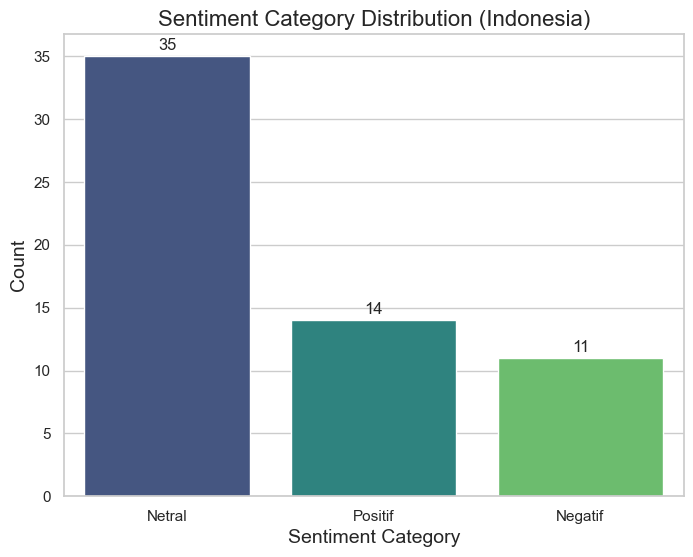

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style of the plot using seaborn
sns.set(style="whitegrid")

# Create a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=sentiment_counts1.index, y=sentiment_counts1.values, palette='viridis')

# Add labels and title
plt.title('Sentiment Category Distribution (Indonesia)', fontsize=16)
plt.xlabel('Sentiment Category', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Display the values on top of the bars
for i in range(len(sentiment_counts1)):
    plt.text(i, sentiment_counts1.values[i] + 0.5, 
             sentiment_counts1.values[i], 
             ha='center', fontsize=12)

# Show the plot
plt.show()

#### Word Cloud (All and Based on Sentiment)

In [49]:
pip install wordcloud

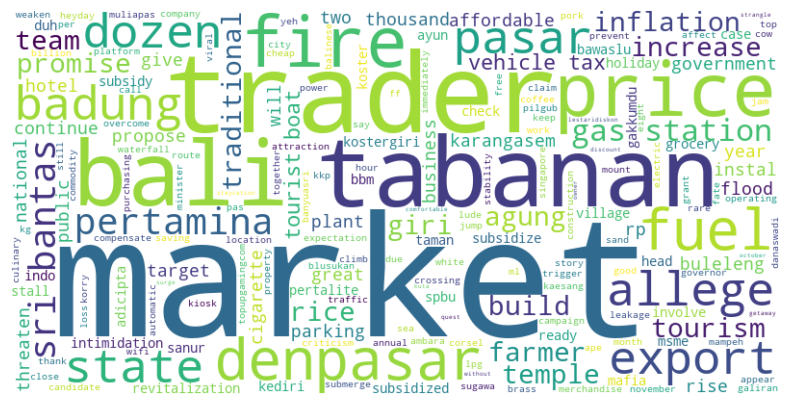

In [50]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all text from the 'Churn_Reason' column into a single string
text = " ".join(cleaned_title_translated for cleaned_title_translated in data_sentiment1['cleaned_title_translated'])

# Create a word cloud
wordcloud_inggris = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_inggris, interpolation='bilinear')
plt.axis('off')  # Remove axes
plt.show()

Based on Sentiment

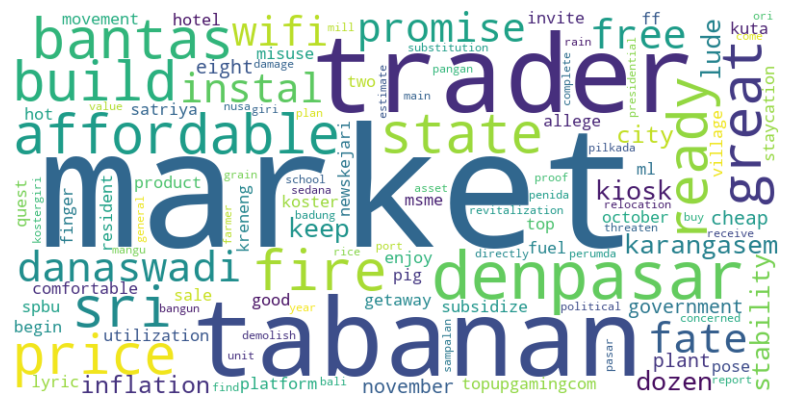

In [51]:
# Sentimen Positif
if data_sentiment1[data_sentiment1['sentiment_category_english'] == "Positif"].shape[0] != 0:
    data_sentiment1_positif = data_sentiment1[data_sentiment1['sentiment_category_english'] == "Positif"]

    text = " ".join(cleaned_title_translated for cleaned_title_translated in data_sentiment1_positif['cleaned_title_translated'])

    # Create a word cloud
    wordcloud_positif_inggris = WordCloud(width=800, height=400, background_color='white').generate(text)

    # Display the word cloud using matplotlib
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud_positif_inggris, interpolation='bilinear')
    plt.axis('off')  # Remove axes
    plt.show()
else:
    print("Tidak ada sentimen positif pada berita")

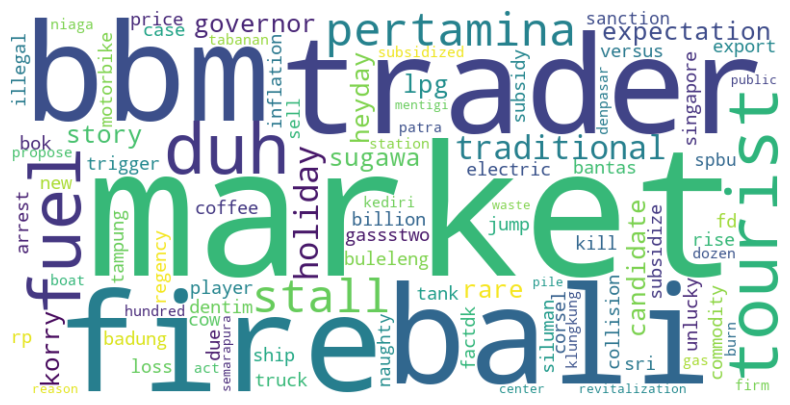

In [52]:
# Sentimen Negatif
if data_sentiment1[data_sentiment1['sentiment_category_english'] == "Negatif"].shape[0] != 0:
    data_sentiment1_negatif = data_sentiment1[data_sentiment1['sentiment_category_english'] == "Negatif"]

    text = " ".join(cleaned_title_translated for cleaned_title_translated in data_sentiment1_negatif['cleaned_title_translated'])

    # Create a word cloud
    wordcloud_negatif_inggris = WordCloud(width=800, height=400, background_color='white').generate(text)

    # Display the word cloud using matplotlib
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud_negatif_inggris, interpolation='bilinear')
    plt.axis('off')  # Remove axes
    plt.show()
else: print("Tidak ada sentimen negatif pada berita")

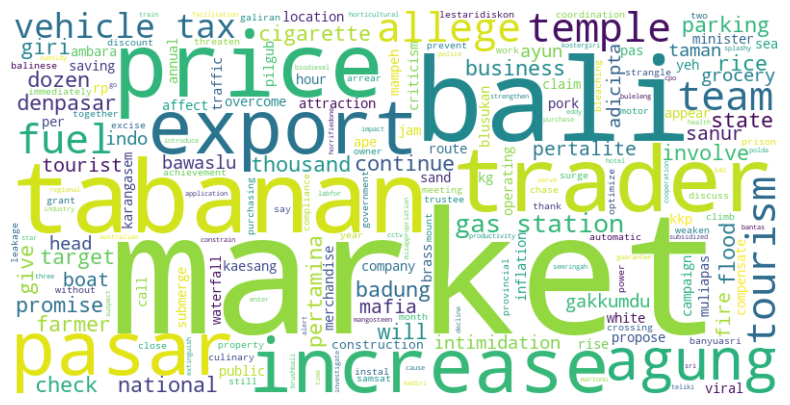

In [76]:
# Sentimen Netral
if data_sentiment1[data_sentiment1['sentiment_category_english'] == "Netral"].shape[0] != 0:
    data_sentiment1_netral = data_sentiment1[data_sentiment1['sentiment_category_english'] == "Netral"]

    text = " ".join(cleaned_title_translated for cleaned_title_translated in data_sentiment1_netral['cleaned_title_translated'])

    # Create a word cloud
    wordcloud_netral_inggris = WordCloud(width=800, height=400, background_color='white').generate(text)

    # Display the word cloud using matplotlib
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud_netral_inggris, interpolation='bilinear')
    plt.axis('off')  # Remove axes
    plt.show()
else: print("Tidak ada sentimen netral pada berita")

### 2. VADER

#### Sentiment

In [54]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [55]:
import pandas as pd
from nltk.sentiment import SentimentIntensityAnalyzer

# Initialize VADER sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Define a function to get sentiment scores with VADER
def get_sentiment_vader(text):
    # VADER provides a compound score which ranges from -1 (negative) to 1 (positive)
    score = sia.polarity_scores(text)['compound']
    return score

# Apply VADER to get the sentiment scores
data_sentiment1['sentiment_score_english_vader'] = data_sentiment1['cleaned_title_translated'].apply(get_sentiment_vader)

# Categorize sentiment with only 2 categories
def categorize_sentiment(score):
    if score > 0.05:  # Threshold for positive sentiment
        return 'Positif'
    elif score < -0.05:  # Threshold for negative sentiment
        return 'Negatif'
    else:
        return 'Netral'  # Scores between -0.05 and 0.05 considered neutral

data_sentiment1['sentiment_category_english_vader'] = data_sentiment1['sentiment_score_english_vader'].apply(categorize_sentiment)

C:\Users\asus\AppData\Local\Temp\ipykernel_25204\17249303.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_sentiment1['sentiment_score_english_vader'] = data_sentiment1['cleaned_title_translated'].apply(get_sentiment_vader)
C:\Users\asus\AppData\Local\Temp\ipykernel_25204\17249303.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_sentiment1['sentiment_category_english_vader'] = data_sentiment1['sentiment_score_english_vader'].apply(categorize_sentiment)


In [56]:
data_sentiment1.head()

keyword                                   title_translated  \
0            harga  Increase in the price of the annual Bali infla...   
1            harga  The price of pork rose to Rp 110 thousand per ...   
2            harga  Expectations of traders to the candidate for g...   
3            harga  Yeh Mampeh Waterfall: location, price, operati...   
4  pajak+kendaraan  Overcome traffic jams, Ambara will increase ve...   

                            cleaned_title_translated  sentiment_score_english  \
0  increase in the price of the annual bali infla...                     0.00   
1  the price of pork rise to rp 110 thousand per ...                     0.00   
2  expectation of trader to the candidate for gov...                    -0.15   
3  yeh mampeh waterfall location price operating ...                     0.00   
4  overcome traffic jam ambara will increase vehi...                     0.00   

  sentiment_category_english  sentiment_score_english_vader  \
0                     Netral                         0.3182   
1                     Netral                         0.0000   
2                    Negatif                         0.0000   
3                     Netral                         0.4588   
4                     Netral                         0.3182   

  sentiment_category_english_vader  
0                          Positif  
1                           Netral  
2                           Netral  
3                          Positif  
4                          Positif

In [57]:
sentiment_counts1_vader = data_sentiment1['sentiment_category_english_vader'].value_counts()
sentiment_counts1_vader

sentiment_category_english_vader
Netral     25
Positif    22
Negatif    13
Name: count, dtype: int64

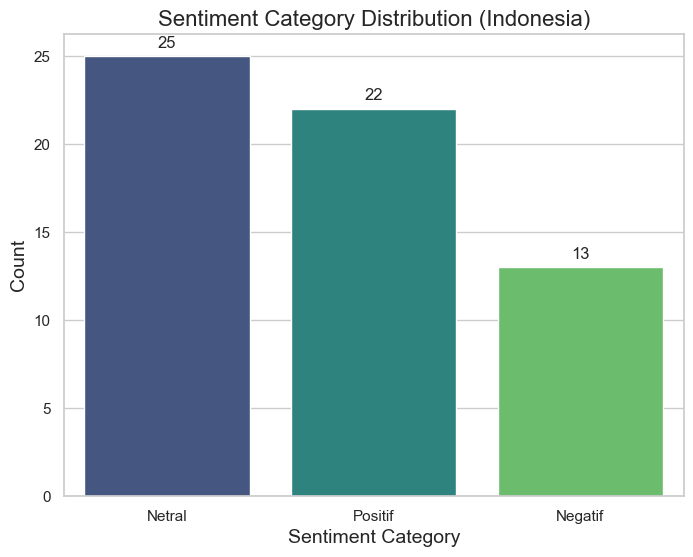

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style of the plot using seaborn
sns.set(style="whitegrid")

# Create a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=sentiment_counts1_vader.index, y=sentiment_counts1_vader.values, palette='viridis')

# Add labels and title
plt.title('Sentiment Category Distribution (Indonesia)', fontsize=16)
plt.xlabel('Sentiment Category', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Display the values on top of the bars
for i in range(len(sentiment_counts1_vader)):
    plt.text(i, sentiment_counts1_vader.values[i] + 0.5, 
             sentiment_counts1_vader.values[i], 
             ha='center', fontsize=12)

# Show the plot
plt.show()

#### Word Cloud (Based on Sentiment Only)

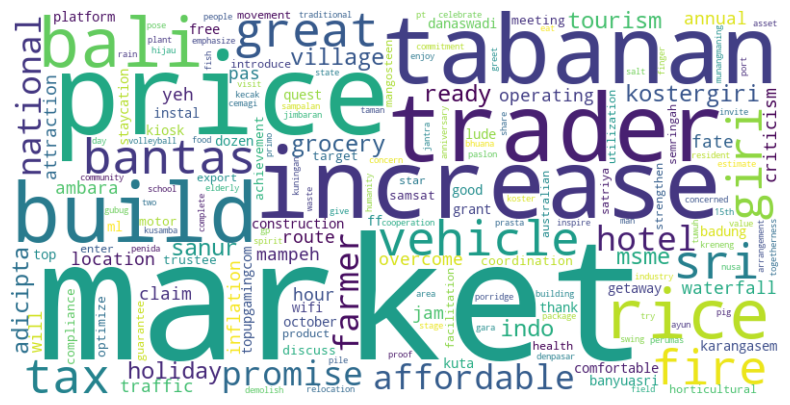

In [59]:
# Sentimen Positif
if data_sentiment1[data_sentiment1['sentiment_category_english_vader'] == "Positif"].shape[0] != 0:
    data_sentiment1_positif_vader = data_sentiment1[data_sentiment1['sentiment_category_english_vader'] == "Positif"]

    text = " ".join(cleaned_title_translated for cleaned_title_translated in data_sentiment1_positif_vader['cleaned_title_translated'])

    # Create a word cloud
    wordcloud_positif_inggris_vader = WordCloud(width=800, height=400, background_color='white').generate(text)

    # Display the word cloud using matplotlib
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud_positif_inggris_vader, interpolation='bilinear')
    plt.axis('off')  # Remove axes
    plt.show()
else: print("Tidak ada sentimen positif pada berita")

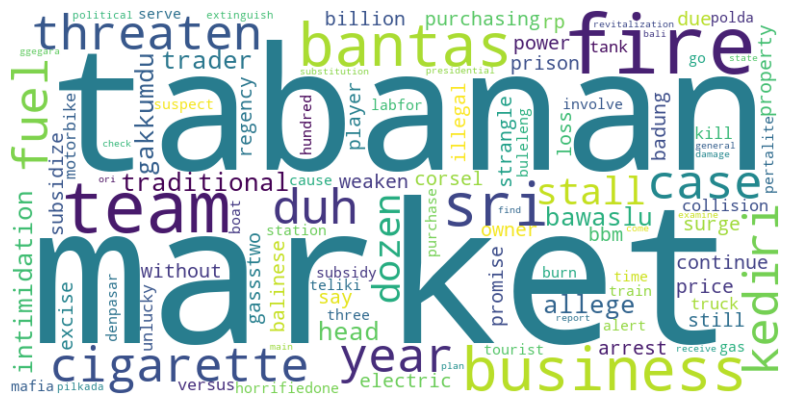

In [60]:
# Sentimen Negatif
if data_sentiment1[data_sentiment1['sentiment_category_english_vader'] == "Negatif"].shape[0] != 0:
    data_sentiment1_negatif_vader = data_sentiment1[data_sentiment1['sentiment_category_english_vader'] == "Negatif"]

    text = " ".join(cleaned_title_translated for cleaned_title_translated in data_sentiment1_negatif_vader['cleaned_title_translated'])

    # Create a word cloud
    wordcloud_negatif_inggris_vader = WordCloud(width=800, height=400, background_color='white').generate(text)

    # Display the word cloud using matplotlib
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud_negatif_inggris_vader, interpolation='bilinear')
    plt.axis('off')  # Remove axes
    plt.show()
else: print("Tidak ada sentimen negatif pada berita")

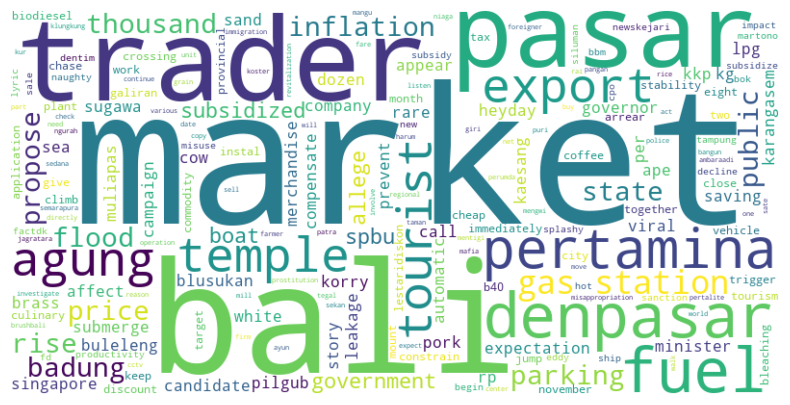

In [61]:
# Sentimen Netral
if data_sentiment1[data_sentiment1['sentiment_category_english_vader'] == "Netral"].shape[0] != 0:
    data_sentiment1_netral_vader = data_sentiment1[data_sentiment1['sentiment_category_english_vader'] == "Netral"]

    text = " ".join(cleaned_title_translated for cleaned_title_translated in data_sentiment1_netral_vader['cleaned_title_translated'])

    # Create a word cloud
    wordcloud_netral_inggris_vader = WordCloud(width=800, height=400, background_color='white').generate(text)

    # Display the word cloud using matplotlib
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud_netral_inggris_vader, interpolation='bilinear')
    plt.axis('off')  # Remove axes
    plt.show()
else: print("Tidak ada sentimen netral pada berita")

### 3. IndoBERT

#### Sentiment

In [62]:
pip install transforms torch

In [63]:
data_sentiment2 = data_ready[['keyword','title','cleaned_title','content']]
data_sentiment2

keyword                                              title  \
0             harga    Kenaikan Harga Beras Kerek Inflasi Tahunan Bali   
1             harga  Harga Daging Babi Naik Jadi Rp 110 Ribu per Kg...   
2             harga  Harapan Pedagang kepada Calon Gubernur Bali: L...   
3             harga  Air Terjun Yeh Mampeh: Lokasi, Harga, Jam Oper...   
4   pajak+kendaraan  Atasi Macet, Ambara Bakal Naikkan Pajak Kendar...   
5            ekspor  Sugawa Korry Cerita Masa Kejayaan Buleleng Eks...   
6            ekspor  Menteri KKP Sebut Puluhan Perusahaan Ajukan Ek...   
7             pasar  Viral, Kera Putih Muncul di Pura Pasar Agung K...   
8             pasar  Nasib Pedagang Pasar Sri Bantas Tabanan Setela...   
9             pasar  Pedagang Pasar Umum Negara yang Terdampak Banj...   
10            pasar  Pasar Umum Negara Kebanjiran, Barang-barang Da...   
11            pasar  Blusukan ke Pasar Badung, Kaesang Kampanyekan ...   
12            pasar  PAS Kritik Klaim Giri soal Pembangunan Pasar B...   
13            pasar  Cegah Kebocoran Parkir, Palang Parkir Otomatis...   
14            pasar  Karya di Pura Pasar Agung, Pendakian ke Gunung...   
15            pasar  Dana-Swadi Janji Pasang Wifi Gratis untuk Selu...   
16            pasar  Kebakaran Hebat Pasar Sri Bantas Tabanan, Pulu...   
17            pasar  Kebakaran Pasar Sri Bantas Akibat Korsleting L...   
18            harga  Jaga Stabilitas Inflasi, Pemkot Denpasar Canan...   
19            harga  Topupgaming.com: Platform Terbaik untuk Top Up...   
20            harga  Harga Kopi Naik, Picu Inflasi di Bali, Komodit...   
21            harga  Daya Beli Melemah, Bisnis Properti Bali Disebu...   
22            harga  Wisata Kuliner Bersama LestariDiskon, Dapat Po...   
23            harga  October Getaway: Staycation Nyaman, Harga Terj...   
24            harga  Harga Rokok Terus Melonjak dan Mencekik, Pemil...   
25  pajak+kendaraan  Gelar Rakornas, Pembina Samsat Tingkat Nasiona...   
26  pajak+kendaraan  Kejar Target, Pemprov Bali Beri Pemutihan Paja...   
27           ekspor  Penerapan Biodiesel B40 Tahun 2025 Terkendala ...   
28           ekspor  Petani Hortikultura Tabanan Dijamin Semringah,...   
29              bbm  Gasss! Dua Pemain BBM Subsidi Ilegal Wilayah K...   
30              bbm  Duh, Tabrakan versus Truk Tangki BBM, Pemotor ...   
31              bbm  Kabar Hot! Kejari Denpasar Mulai Lirik Dugaan ...   
32              bbm  Fakta Baru!  Boks Siluman DK 9953 FD, Tampung ...   
33              bbm  Heboh Penyelewengan BBM Bersubsidi,  Pertamina...   
34              bbm  Jual BBM Subsidi ke Kapal Wisata, Pertamina Pa...   
35              bbm  SIKAT!!! Polda Bali dan Pertamina Usut Dugaan ...   
36              bbm  Ngeri! Salah Satu SPBU di Denpasar diduga Terl...   
37            pasar  Datangi Pasar Sri Bantas, Kediri, Tabanan, Tim...   
38            pasar  Satriya Siap Bangun 10 Pasar Desa dan Gerakan ...   
39            pasar  Duh, Ratusan Lapak dan Puluhan Kios Pedagang P...   
40            pasar  The Sanur Perkenalkan KEK Kesehatan Sanur ke P...   
41            pasar  Nikmati Babi Guling di Pasar Kreneng Denpasar,...   
42            pasar  Biar Bisa Sigap Setiap Saat, Puluhan Pedagang ...   
43            pasar  Gegara Tahun Politik, Pilkada dan Pergantian P...   
44            pasar  Perumda Pasar Pangan Mangu Giri Sedana Badung ...   
45            pasar  10 WNA Terjaring  Operasi JAGRATARA Imigrasi N...   
46            pasar  Ambara-Adi Dengarkan Kebutuhan Pedagang Pasar ...   
47            pasar  Gegara Dugaan Intimidasi, Tim Gakkumdu Bawaslu...   
48            pasar  Taksir Nilai Aset Belum Tuntas, Pasar Relokasi...   
49            pasar  Tim Gakkumdu Bawaslu Periksa Kepala Pasar Taba...   
50            pasar  Prihatin Pedagang Kehujanan, Koster-Giri Siap ...   
51            pasar  Klungkung Ajukan Revitalisasi Pasar Umum Semar...   
52            pasar             Libur Hari Raya, Sampah Pasar Menumpuk   
53            pa

In [64]:
from transformers import BertForSequenceClassification, BertTokenizer
import torch

# Load the saved model and tokenizer
model_load_path = "C:/Users/asus/OneDrive/BPS/Neraca/smsa_bpsbali_indobert_model"  # The path where the model is saved
tokenizer_load_path = "C:/Users/asus/OneDrive/BPS/Neraca/smsa_bpsbali_indobert_tokenizer"  # The path where the tokenizer is saved

# Load the model and tokenizer
model = BertForSequenceClassification.from_pretrained(model_load_path)
tokenizer = BertTokenizer.from_pretrained(tokenizer_load_path)

In [65]:
from torch.nn.functional import softmax  # Softmax function to convert logits to probabilities

# Initialize an empty list to collect predictions
sentiment_predict = []
probabilities = []

# Loop through the cleaned titles
for text in data_sentiment2['cleaned_title']:
    # Tokenize the input text
    inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True, max_length=512)

    # Make prediction
    model.eval()  # Set model to evaluation mode
    with torch.no_grad():  # Disable gradients for inference
        outputs = model(**inputs)

    # Get the logits (raw scores)
    logits = outputs.logits
    
    # Apply softmax to convert logits to probabilities
    probs = softmax(logits, dim=-1)  # Softmax along the class dimension (last dimension)

    # Get the predicted class (index of max logit)
    predicted_class = logits.argmax(dim=-1).item()

    # Get the probability of the predicted class
    predicted_prob = probs[0, predicted_class].item()

    # Convert prediction to string label
    if predicted_class == 0:
        sentiment_label = "positif"
    elif predicted_class == 1:
        sentiment_label = "netral"
    else:
        sentiment_label = "negatif"

    # Append the sentiment label and its probability
    sentiment_predict.append(sentiment_label)
    probabilities.append(predicted_prob)

# After the loop, create the DataFrame
sentiment_predict_df = pd.DataFrame({
    'sentiment': sentiment_predict,
    'probability': probabilities
})

# Add it as a new column to the original DataFrame
data_sentiment2['sentiment_score_indonesia'] = sentiment_predict_df['probability']
data_sentiment2['sentiment_category_indonesia'] = sentiment_predict_df['sentiment']

# Optionally, you can print the DataFrame to check the results
data_sentiment2


C:\Users\asus\AppData\Local\Temp\ipykernel_25204\1096017218.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_sentiment2['sentiment_score_indonesia'] = sentiment_predict_df['probability']
C:\Users\asus\AppData\Local\Temp\ipykernel_25204\1096017218.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_sentiment2['sentiment_category_indonesia'] = sentiment_predict_df['sentiment']


keyword                                              title  \
0             harga    Kenaikan Harga Beras Kerek Inflasi Tahunan Bali   
1             harga  Harga Daging Babi Naik Jadi Rp 110 Ribu per Kg...   
2             harga  Harapan Pedagang kepada Calon Gubernur Bali: L...   
3             harga  Air Terjun Yeh Mampeh: Lokasi, Harga, Jam Oper...   
4   pajak+kendaraan  Atasi Macet, Ambara Bakal Naikkan Pajak Kendar...   
5            ekspor  Sugawa Korry Cerita Masa Kejayaan Buleleng Eks...   
6            ekspor  Menteri KKP Sebut Puluhan Perusahaan Ajukan Ek...   
7             pasar  Viral, Kera Putih Muncul di Pura Pasar Agung K...   
8             pasar  Nasib Pedagang Pasar Sri Bantas Tabanan Setela...   
9             pasar  Pedagang Pasar Umum Negara yang Terdampak Banj...   
10            pasar  Pasar Umum Negara Kebanjiran, Barang-barang Da...   
11            pasar  Blusukan ke Pasar Badung, Kaesang Kampanyekan ...   
12            pasar  PAS Kritik Klaim Giri soal Pembangunan Pasar B...   
13            pasar  Cegah Kebocoran Parkir, Palang Parkir Otomatis...   
14            pasar  Karya di Pura Pasar Agung, Pendakian ke Gunung...   
15            pasar  Dana-Swadi Janji Pasang Wifi Gratis untuk Selu...   
16            pasar  Kebakaran Hebat Pasar Sri Bantas Tabanan, Pulu...   
17            pasar  Kebakaran Pasar Sri Bantas Akibat Korsleting L...   
18            harga  Jaga Stabilitas Inflasi, Pemkot Denpasar Canan...   
19            harga  Topupgaming.com: Platform Terbaik untuk Top Up...   
20            harga  Harga Kopi Naik, Picu Inflasi di Bali, Komodit...   
21            harga  Daya Beli Melemah, Bisnis Properti Bali Disebu...   
22            harga  Wisata Kuliner Bersama LestariDiskon, Dapat Po...   
23            harga  October Getaway: Staycation Nyaman, Harga Terj...   
24            harga  Harga Rokok Terus Melonjak dan Mencekik, Pemil...   
25  pajak+kendaraan  Gelar Rakornas, Pembina Samsat Tingkat Nasiona...   
26  pajak+kendaraan  Kejar Target, Pemprov Bali Beri Pemutihan Paja...   
27           ekspor  Penerapan Biodiesel B40 Tahun 2025 Terkendala ...   
28           ekspor  Petani Hortikultura Tabanan Dijamin Semringah,...   
29              bbm  Gasss! Dua Pemain BBM Subsidi Ilegal Wilayah K...   
30              bbm  Duh, Tabrakan versus Truk Tangki BBM, Pemotor ...   
31              bbm  Kabar Hot! Kejari Denpasar Mulai Lirik Dugaan ...   
32              bbm  Fakta Baru!  Boks Siluman DK 9953 FD, Tampung ...   
33              bbm  Heboh Penyelewengan BBM Bersubsidi,  Pertamina...   
34              bbm  Jual BBM Subsidi ke Kapal Wisata, Pertamina Pa...   
35              bbm  SIKAT!!! Polda Bali dan Pertamina Usut Dugaan ...   
36              bbm  Ngeri! Salah Satu SPBU di Denpasar diduga Terl...   
37            pasar  Datangi Pasar Sri Bantas, Kediri, Tabanan, Tim...   
38            pasar  Satriya Siap Bangun 10 Pasar Desa dan Gerakan ...   
39            pasar  Duh, Ratusan Lapak dan Puluhan Kios Pedagang P...   
40            pasar  The Sanur Perkenalkan KEK Kesehatan Sanur ke P...   
41            pasar  Nikmati Babi Guling di Pasar Kreneng Denpasar,...   
42            pasar  Biar Bisa Sigap Setiap Saat, Puluhan Pedagang ...   
43            pasar  Gegara Tahun Politik, Pilkada dan Pergantian P...   
44            pasar  Perumda Pasar Pangan Mangu Giri Sedana Badung ...   
45            pasar  10 WNA Terjaring  Operasi JAGRATARA Imigrasi N...   
46            pasar  Ambara-Adi Dengarkan Kebutuhan Pedagang Pasar ...   
47            pasar  Gegara Dugaan Intimidasi, Tim Gakkumdu Bawaslu...   
48            pasar  Taksir Nilai Aset Belum Tuntas, Pasar Relokasi...   
49            pasar  Tim Gakkumdu Bawaslu Periksa Kepala Pasar Taba...   
50            pasar  Prihatin Pedagang Kehujanan, Koster-Giri Siap ...   
51            pasar  Klungkung Ajukan Revitalisasi Pasar Umum Semar...   
52            pasar             Libur Hari Raya, Sampah Pasar Menumpuk   
53            pa

In [66]:
sentiment_counts2 = data_sentiment2['sentiment_category_indonesia'].value_counts()
sentiment_counts2

sentiment_category_indonesia
netral     49
negatif     6
positif     5
Name: count, dtype: int64

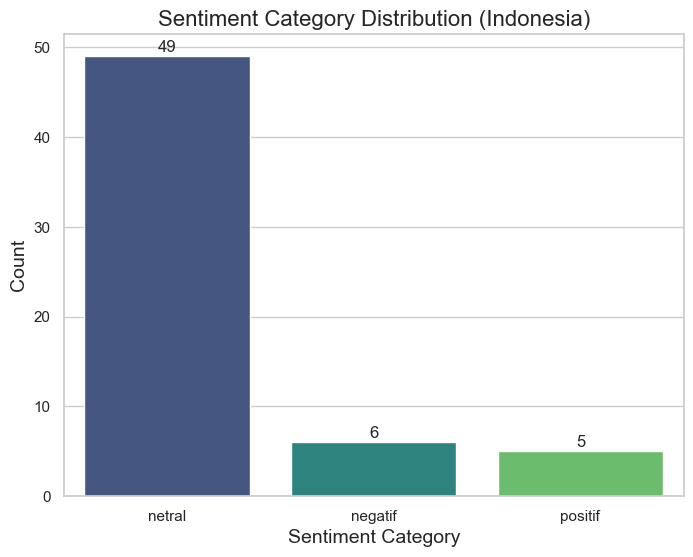

In [67]:
import seaborn as sns

# Set the style of the plot using seaborn
sns.set(style="whitegrid")

# Create a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=sentiment_counts2.index, y=sentiment_counts2.values, palette='viridis')

# Add labels and title
plt.title('Sentiment Category Distribution (Indonesia)', fontsize=16)
plt.xlabel('Sentiment Category', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Display the values on top of the bars
for i in range(len(sentiment_counts2)):
    plt.text(i, sentiment_counts2.values[i] + 0.5, 
             sentiment_counts2.values[i], 
             ha='center', fontsize=12)

# Show the plot
plt.show()

#### Word Cloud (All and Based on Sentiment)

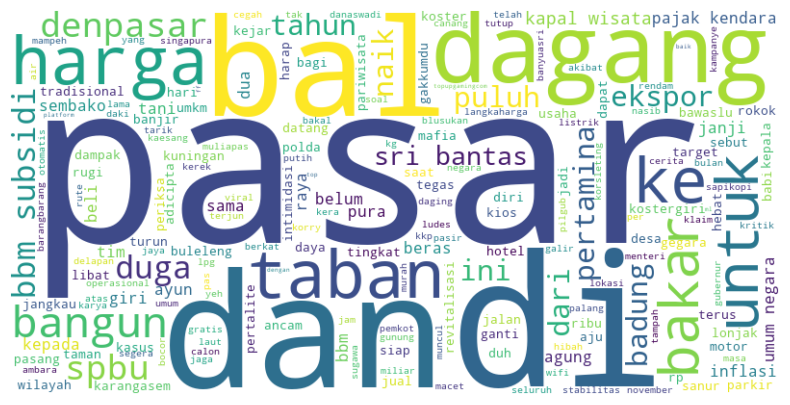

In [68]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all text from the 'Churn_Reason' column into a single string
text = " ".join(cleaned_title for cleaned_title in data_sentiment2['cleaned_title'])

# Create a word cloud
wordcloud_indonesia = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_indonesia, interpolation='bilinear')
plt.axis('off')  # Remove axes
plt.show()

Based on Sentiment

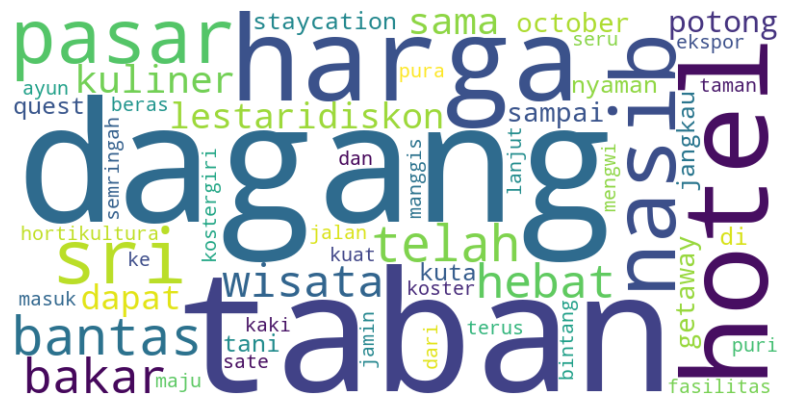

In [69]:
# Sentimen Positif
if data_sentiment2[data_sentiment2['sentiment_category_indonesia'] == "positif"].shape[0] != 0:
    data_sentiment2_positif = data_sentiment2[data_sentiment2['sentiment_category_indonesia'] == "positif"]

    text = " ".join(cleaned_title for cleaned_title in data_sentiment2_positif['cleaned_title'])

    # Create a word cloud
    wordcloud_positif_indonesia = WordCloud(width=800, height=400, background_color='white').generate(text)

    # Display the word cloud using matplotlib
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud_positif_indonesia, interpolation='bilinear')
    plt.axis('off')  # Remove axes
    plt.show()
else: print("Tidak ada sentimen positif pada berita")

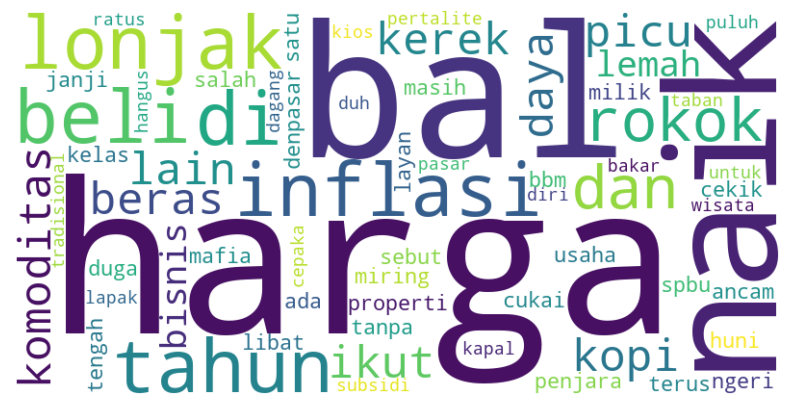

In [70]:
# Sentimen Negatif
if data_sentiment2[data_sentiment2['sentiment_category_indonesia'] == "negatif"].shape[0] != 0:
    data_sentiment2_negatif = data_sentiment2[data_sentiment2['sentiment_category_indonesia'] == "negatif"]

    text = " ".join(cleaned_title for cleaned_title in data_sentiment2_negatif['cleaned_title'])

    # Create a word cloud
    wordcloud_negatif_indonesia = WordCloud(width=800, height=400, background_color='white').generate(text)

    # Display the word cloud using matplotlib
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud_negatif_indonesia, interpolation='bilinear')
    plt.axis('off')  # Remove axes
    plt.show()
else: print("Tidak ada sentimen negatif pada berita")

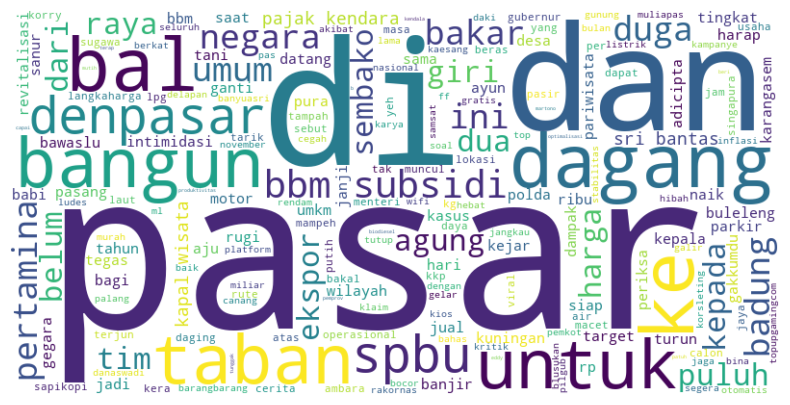

In [71]:
# Sentimen Netral
if data_sentiment2[data_sentiment2['sentiment_category_indonesia'] == "netral"].shape[0] != 0:
    data_sentiment2_netral = data_sentiment2[data_sentiment2['sentiment_category_indonesia'] == "netral"]

    text = " ".join(cleaned_title for cleaned_title in data_sentiment2_netral['cleaned_title'])

    # Create a word cloud
    wordcloud_netral_indonesia = WordCloud(width=800, height=400, background_color='white').generate(text)

    # Display the word cloud using matplotlib
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud_netral_indonesia, interpolation='bilinear')
    plt.axis('off')  # Remove axes
    plt.show()
else: print("Tidak ada sentimen netral pada berita")

### Export Result

In [72]:
print(data_sentiment1.shape)
data_sentiment1.head()

(60, 7)


keyword                                   title_translated  \
0            harga  Increase in the price of the annual Bali infla...   
1            harga  The price of pork rose to Rp 110 thousand per ...   
2            harga  Expectations of traders to the candidate for g...   
3            harga  Yeh Mampeh Waterfall: location, price, operati...   
4  pajak+kendaraan  Overcome traffic jams, Ambara will increase ve...   

                            cleaned_title_translated  sentiment_score_english  \
0  increase in the price of the annual bali infla...                     0.00   
1  the price of pork rise to rp 110 thousand per ...                     0.00   
2  expectation of trader to the candidate for gov...                    -0.15   
3  yeh mampeh waterfall location price operating ...                     0.00   
4  overcome traffic jam ambara will increase vehi...                     0.00   

  sentiment_category_english  sentiment_score_english_vader  \
0                     Netral                         0.3182   
1                     Netral                         0.0000   
2                    Negatif                         0.0000   
3                     Netral                         0.4588   
4                     Netral                         0.3182   

  sentiment_category_english_vader  
0                          Positif  
1                           Netral  
2                           Netral  
3                          Positif  
4                          Positif

In [73]:
print(data_sentiment2.shape)
data_sentiment2.head()

(60, 6)


keyword                                              title  \
0            harga    Kenaikan Harga Beras Kerek Inflasi Tahunan Bali   
1            harga  Harga Daging Babi Naik Jadi Rp 110 Ribu per Kg...   
2            harga  Harapan Pedagang kepada Calon Gubernur Bali: L...   
3            harga  Air Terjun Yeh Mampeh: Lokasi, Harga, Jam Oper...   
4  pajak+kendaraan  Atasi Macet, Ambara Bakal Naikkan Pajak Kendar...   

                                       cleaned_title  \
0           naik harga beras kerek inflasi tahun bal   
1  harga daging babi naik jadi rp ribu per kg saa...   
2  harap dagang kepada calon gubernur bal lpg tak...   
3  air terjun yeh mampeh lokasi harga jam operasi...   
4         atas macet ambara bakal naik pajak kendara   

                                             content  \
0  Badan Pusat Statistik (BPS) Provinsi Bali menc...   
1  Penampahan Kuningan (sehari menjelang Hari Ray...   
2  Sejumlah pedagang di Denpasar menaruh harapan ...   
3  Bali menjadi salah satu destinasi wisata di du...   
4  Calon wali kota Denpasar nomor urut 1 Gede Ngu...   

   sentiment_score_indonesia sentiment_category_indonesia  
0                   0.840645                      negatif  
1                   0.992054                       netral  
2                   0.993607                       netral  
3                   0.705643                       netral  
4                   0.991611                       netral

In [74]:
# Assigning columns individually
sentiment_result = data_sentiment2.copy()  # Copy data_sentiment2 to avoid modifying the original

# Assign columns from data_sentiment1 to sentiment_result
sentiment_result['title_translated'] = data_sentiment1['title_translated']
sentiment_result['cleaned_title_translated'] = data_sentiment1['cleaned_title_translated']
sentiment_result['sentiment_category_english'] = data_sentiment1['sentiment_category_english']
sentiment_result['sentiment_score_english'] = data_sentiment1['sentiment_score_english']
sentiment_result['sentiment_category_english_vader'] = data_sentiment1['sentiment_category_english_vader']
sentiment_result['sentiment_score_english_vader'] = data_sentiment1['sentiment_score_english_vader']

print(sentiment_result.shape)
sentiment_result.head()

(60, 12)


keyword                                              title  \
0            harga    Kenaikan Harga Beras Kerek Inflasi Tahunan Bali   
1            harga  Harga Daging Babi Naik Jadi Rp 110 Ribu per Kg...   
2            harga  Harapan Pedagang kepada Calon Gubernur Bali: L...   
3            harga  Air Terjun Yeh Mampeh: Lokasi, Harga, Jam Oper...   
4  pajak+kendaraan  Atasi Macet, Ambara Bakal Naikkan Pajak Kendar...   

                                       cleaned_title  \
0           naik harga beras kerek inflasi tahun bal   
1  harga daging babi naik jadi rp ribu per kg saa...   
2  harap dagang kepada calon gubernur bal lpg tak...   
3  air terjun yeh mampeh lokasi harga jam operasi...   
4         atas macet ambara bakal naik pajak kendara   

                                             content  \
0  Badan Pusat Statistik (BPS) Provinsi Bali menc...   
1  Penampahan Kuningan (sehari menjelang Hari Ray...   
2  Sejumlah pedagang di Denpasar menaruh harapan ...   
3  Bali menjadi salah satu destinasi wisata di du...   
4  Calon wali kota Denpasar nomor urut 1 Gede Ngu...   

   sentiment_score_indonesia sentiment_category_indonesia  \
0                   0.840645                      negatif   
1                   0.992054                       netral   
2                   0.993607                       netral   
3                   0.705643                       netral   
4                   0.991611                       netral   

                                    title_translated  \
0  Increase in the price of the annual Bali infla...   
1  The price of pork rose to Rp 110 thousand per ...   
2  Expectations of traders to the candidate for g...   
3  Yeh Mampeh Waterfall: location, price, operati...   
4  Overcome traffic jams, Ambara will increase ve...   

                            cleaned_title_translated  \
0  increase in the price of the annual bali infla...   
1  the price of pork rise to rp 110 thousand per ...   
2  expectation of trader to the candidate for gov...   
3  yeh mampeh waterfall location price operating ...   
4  overcome traffic jam ambara will increase vehi...   

  sentiment_category_english  sentiment_score_english  \
0                     Netral                     0.00   
1                     Netral                     0.00   
2                    Negatif                    -0.15   
3                     Netral                     0.00   
4                     Netral                     0.00   

  sentiment_category_english_vader  sentiment_score_english_vader  
0                          Positif                         0.3182  
1                           Netral                         0.0000  
2                           Netral                         0.0000  
3                          Positif                         0.4588  
4                          Positif                         0.3182

In [75]:
sentiment_result.to_excel("C:/Users/asus/OneDrive/BPS/Neraca/sentimentresult_sektor7_triwulan4_bali.xlsx")